In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# set up Chinese fonts
plt.rcParams['font.sans-serif'] = ['SimHei'] # Or any other Chinese characters
plt.rcParams['axes.unicode_minus'] = False

In [16]:
def to_int(value):
    if value:
        return int(value, 10)
    else:
        return 0

# Convert dictionary for converting digit strings to integers.
convert = dict(zip(['start', 'state', 'lord', 'span', 'notes'], [to_int, None, None, to_int, None]))

# Read table and convert digit strings to int.
df = pd.read_csv("..\\db\\csv\\xian_qin - 先秦諸侯王表.csv", header=0, converters=convert)
df


,start,state,lord,span,notes
0,-591,蔡,景公,49,表1
1,-575,宋,平公,44,
2,-572,魯,襄公,31,
3,-571,周,靈王,27,
4,-568,陳,平公,35,
...,...,...,...,...,...
176,-235,趙,王遷,8,
177,-227,魏,王假,3,-224 滅
178,-227,趙,代王嘉,6,-221 滅
179,-227,楚,王負芻,5,-222 滅


In [17]:
# Group df by state
gb_state = df.groupby('state')

In [18]:
# Function that plots barh chart base on df_x
def plot_barh(df_x, lb, rb, title):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Set fig size
    fig.set_figwidth(35)
    fig.set_figheight(25)
    plt.rc('font', size=18)          # controls default text sizes

    # Plot colored bars for each row
    for index, row in df_x.iterrows():
        birth_year = row['start']
        lifespan = df_x.loc[index, 'span']
        
        if title == 'state':
            y = row['lord']
        else:
            y = row['state']
        ax.barh(y, lifespan, left=birth_year, color='skyblue')
        state = row['state']
        lord = row['lord']
        ax.text(birth_year + lifespan / 2, y, f'{state} {lord} ({lifespan})', ha='center', va='center', color='black')

    # Set x-axis range from lb to rb
    ax.set_xlim(lb, rb)

    ax.set_xlabel('start')
    
    if title == 'state':
        ax.set_title(state)
    else:
        ax.set_title(title)

    # Show the plot
    plt.show()

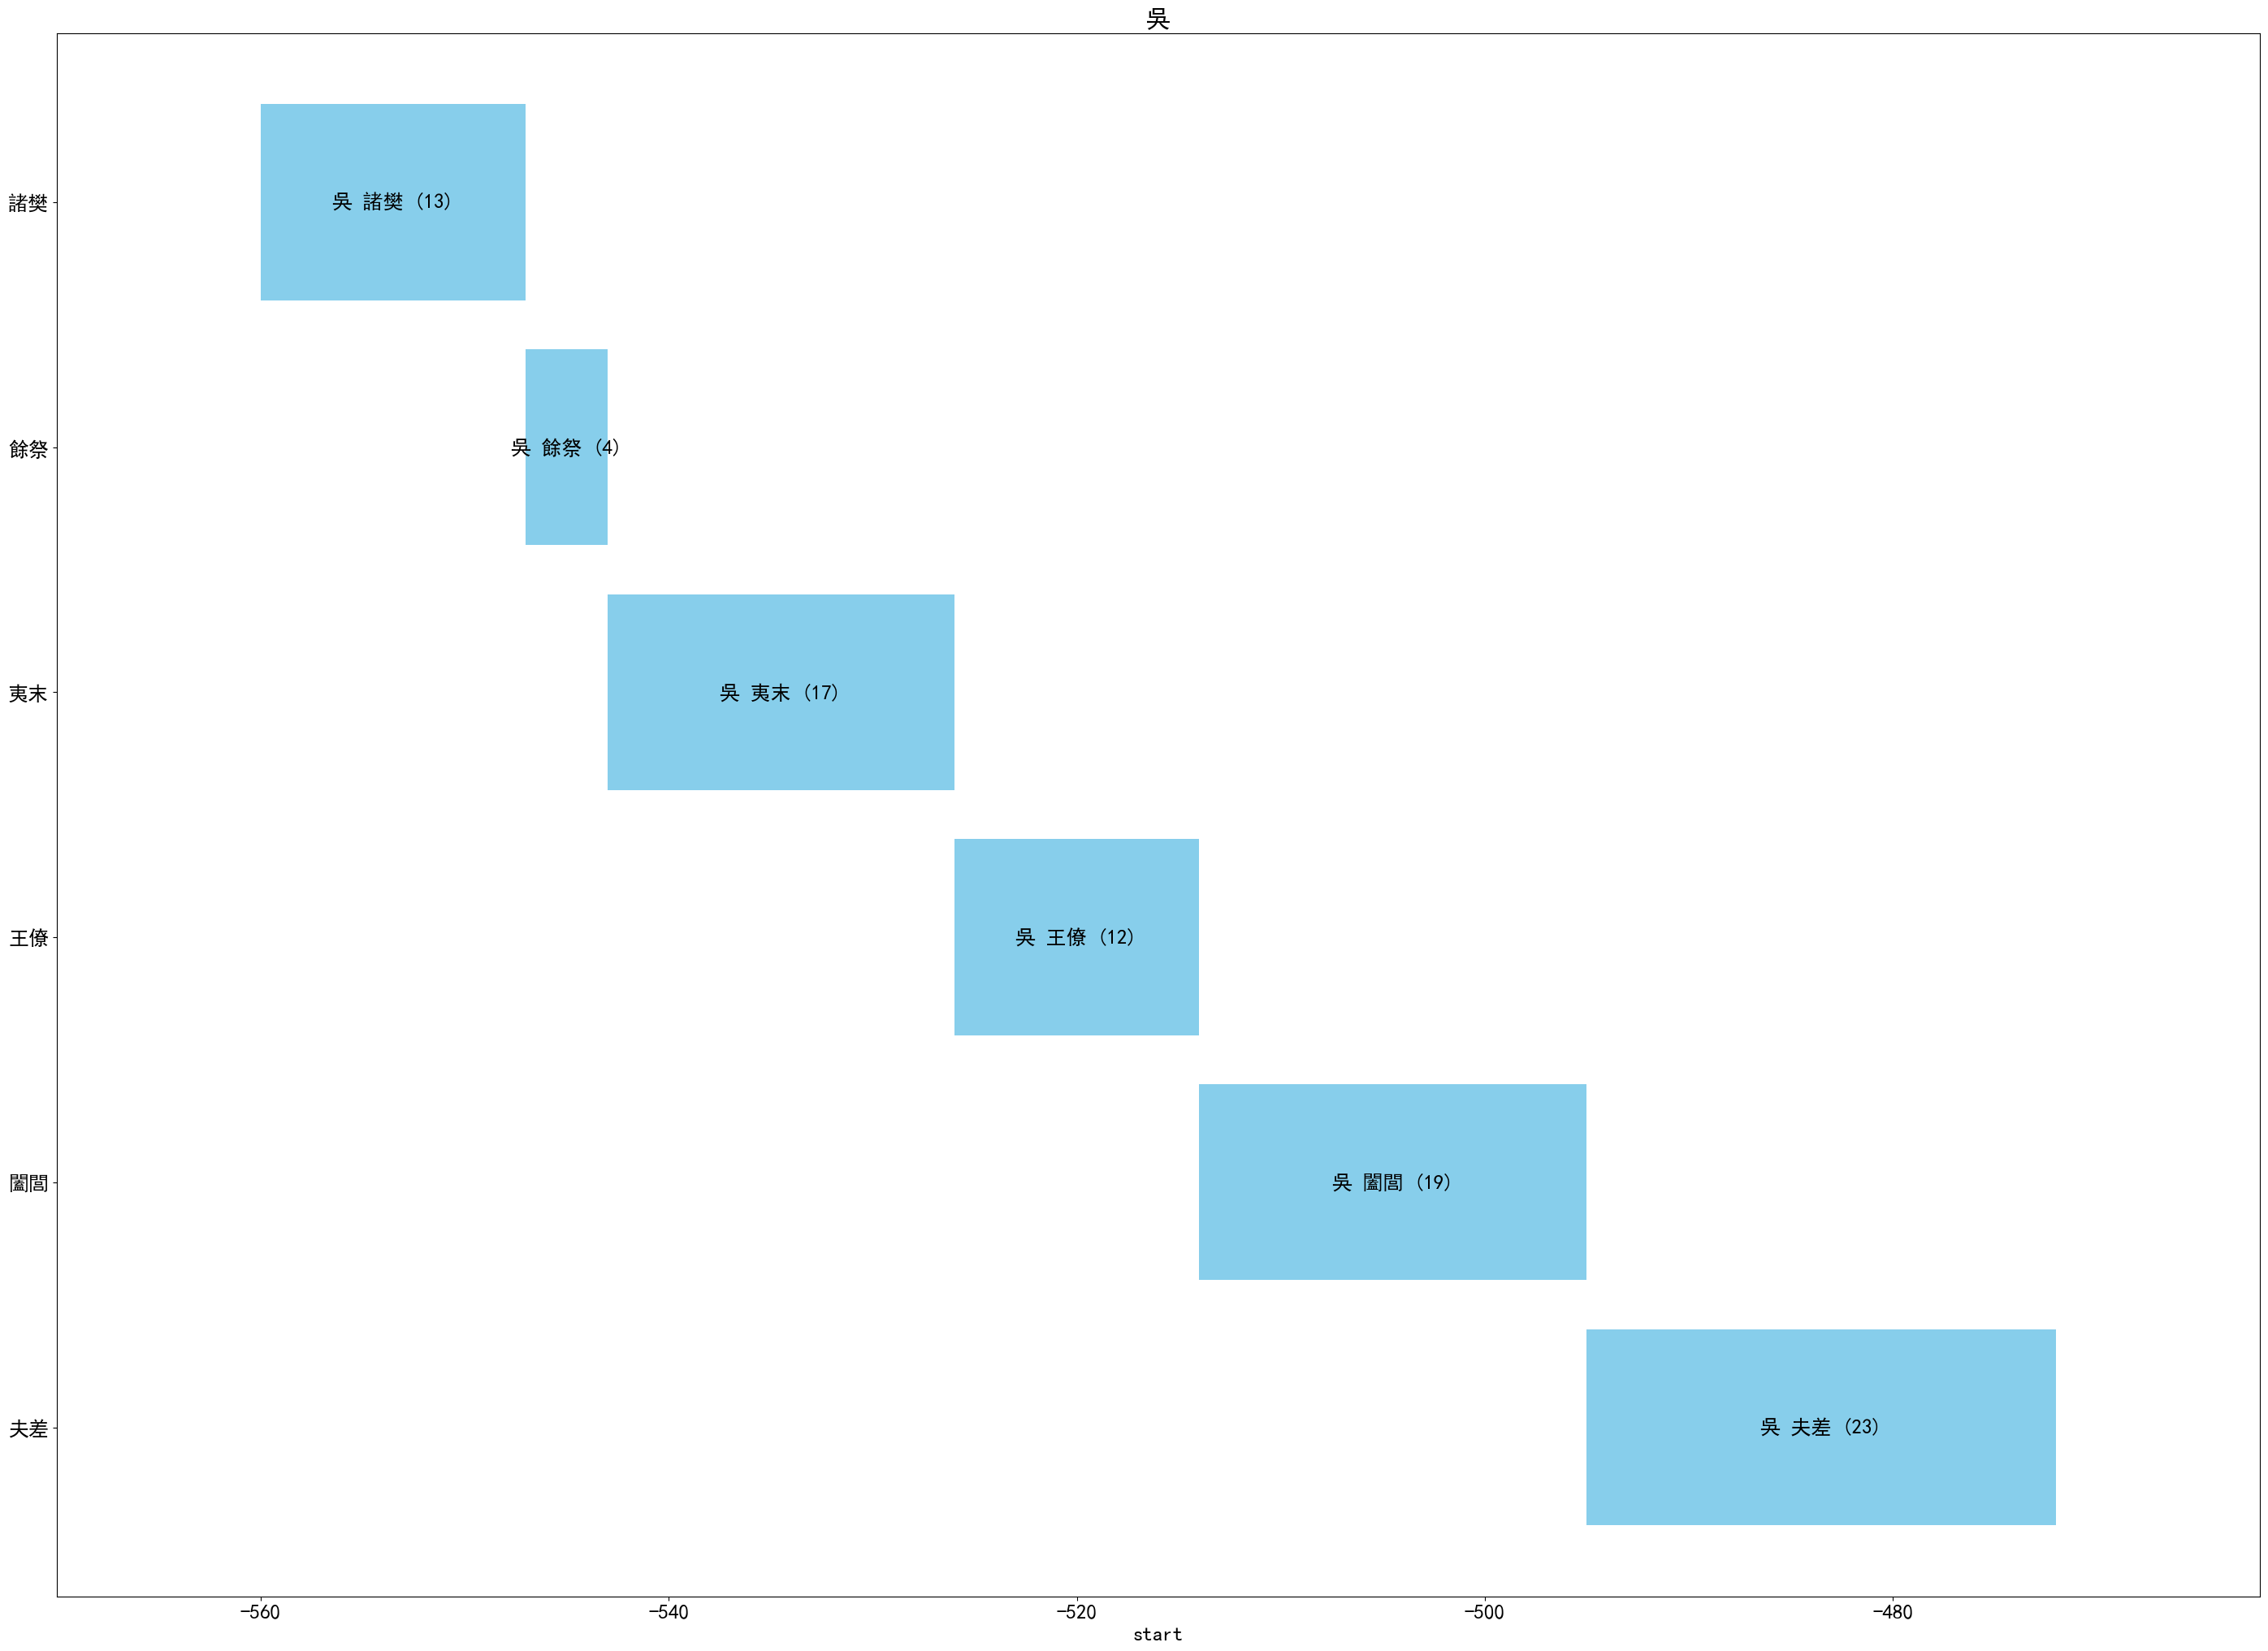

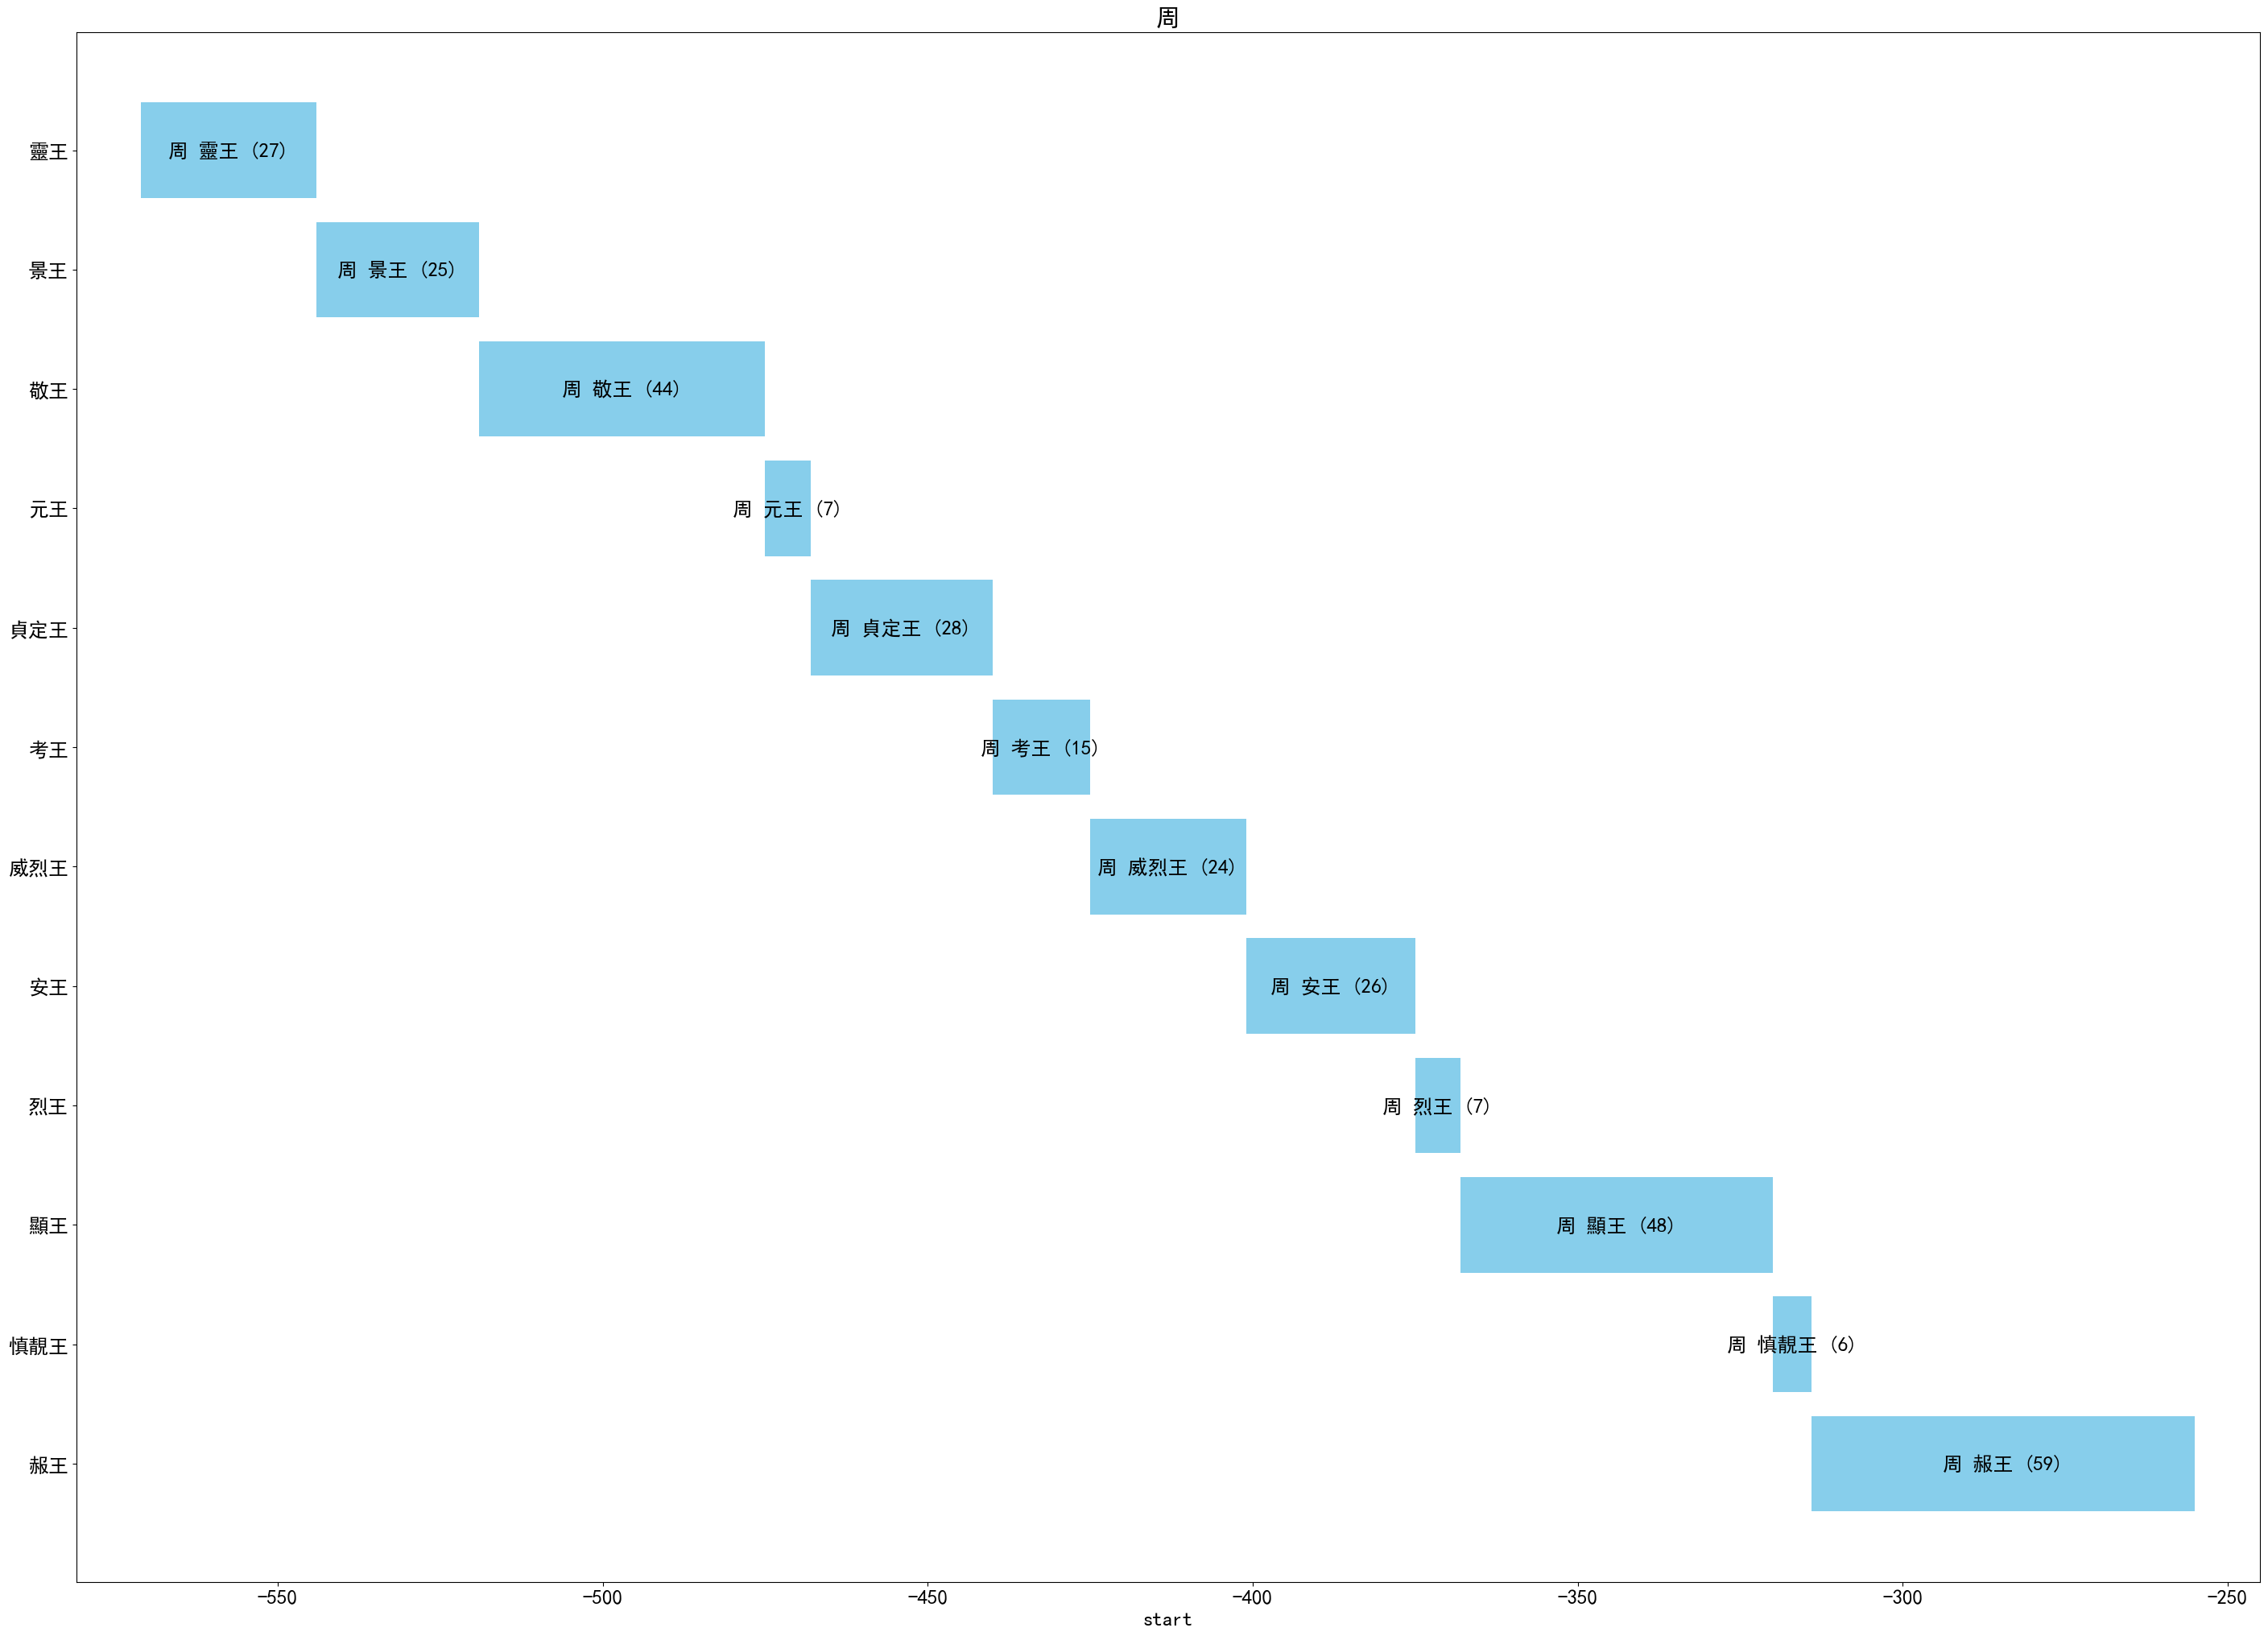

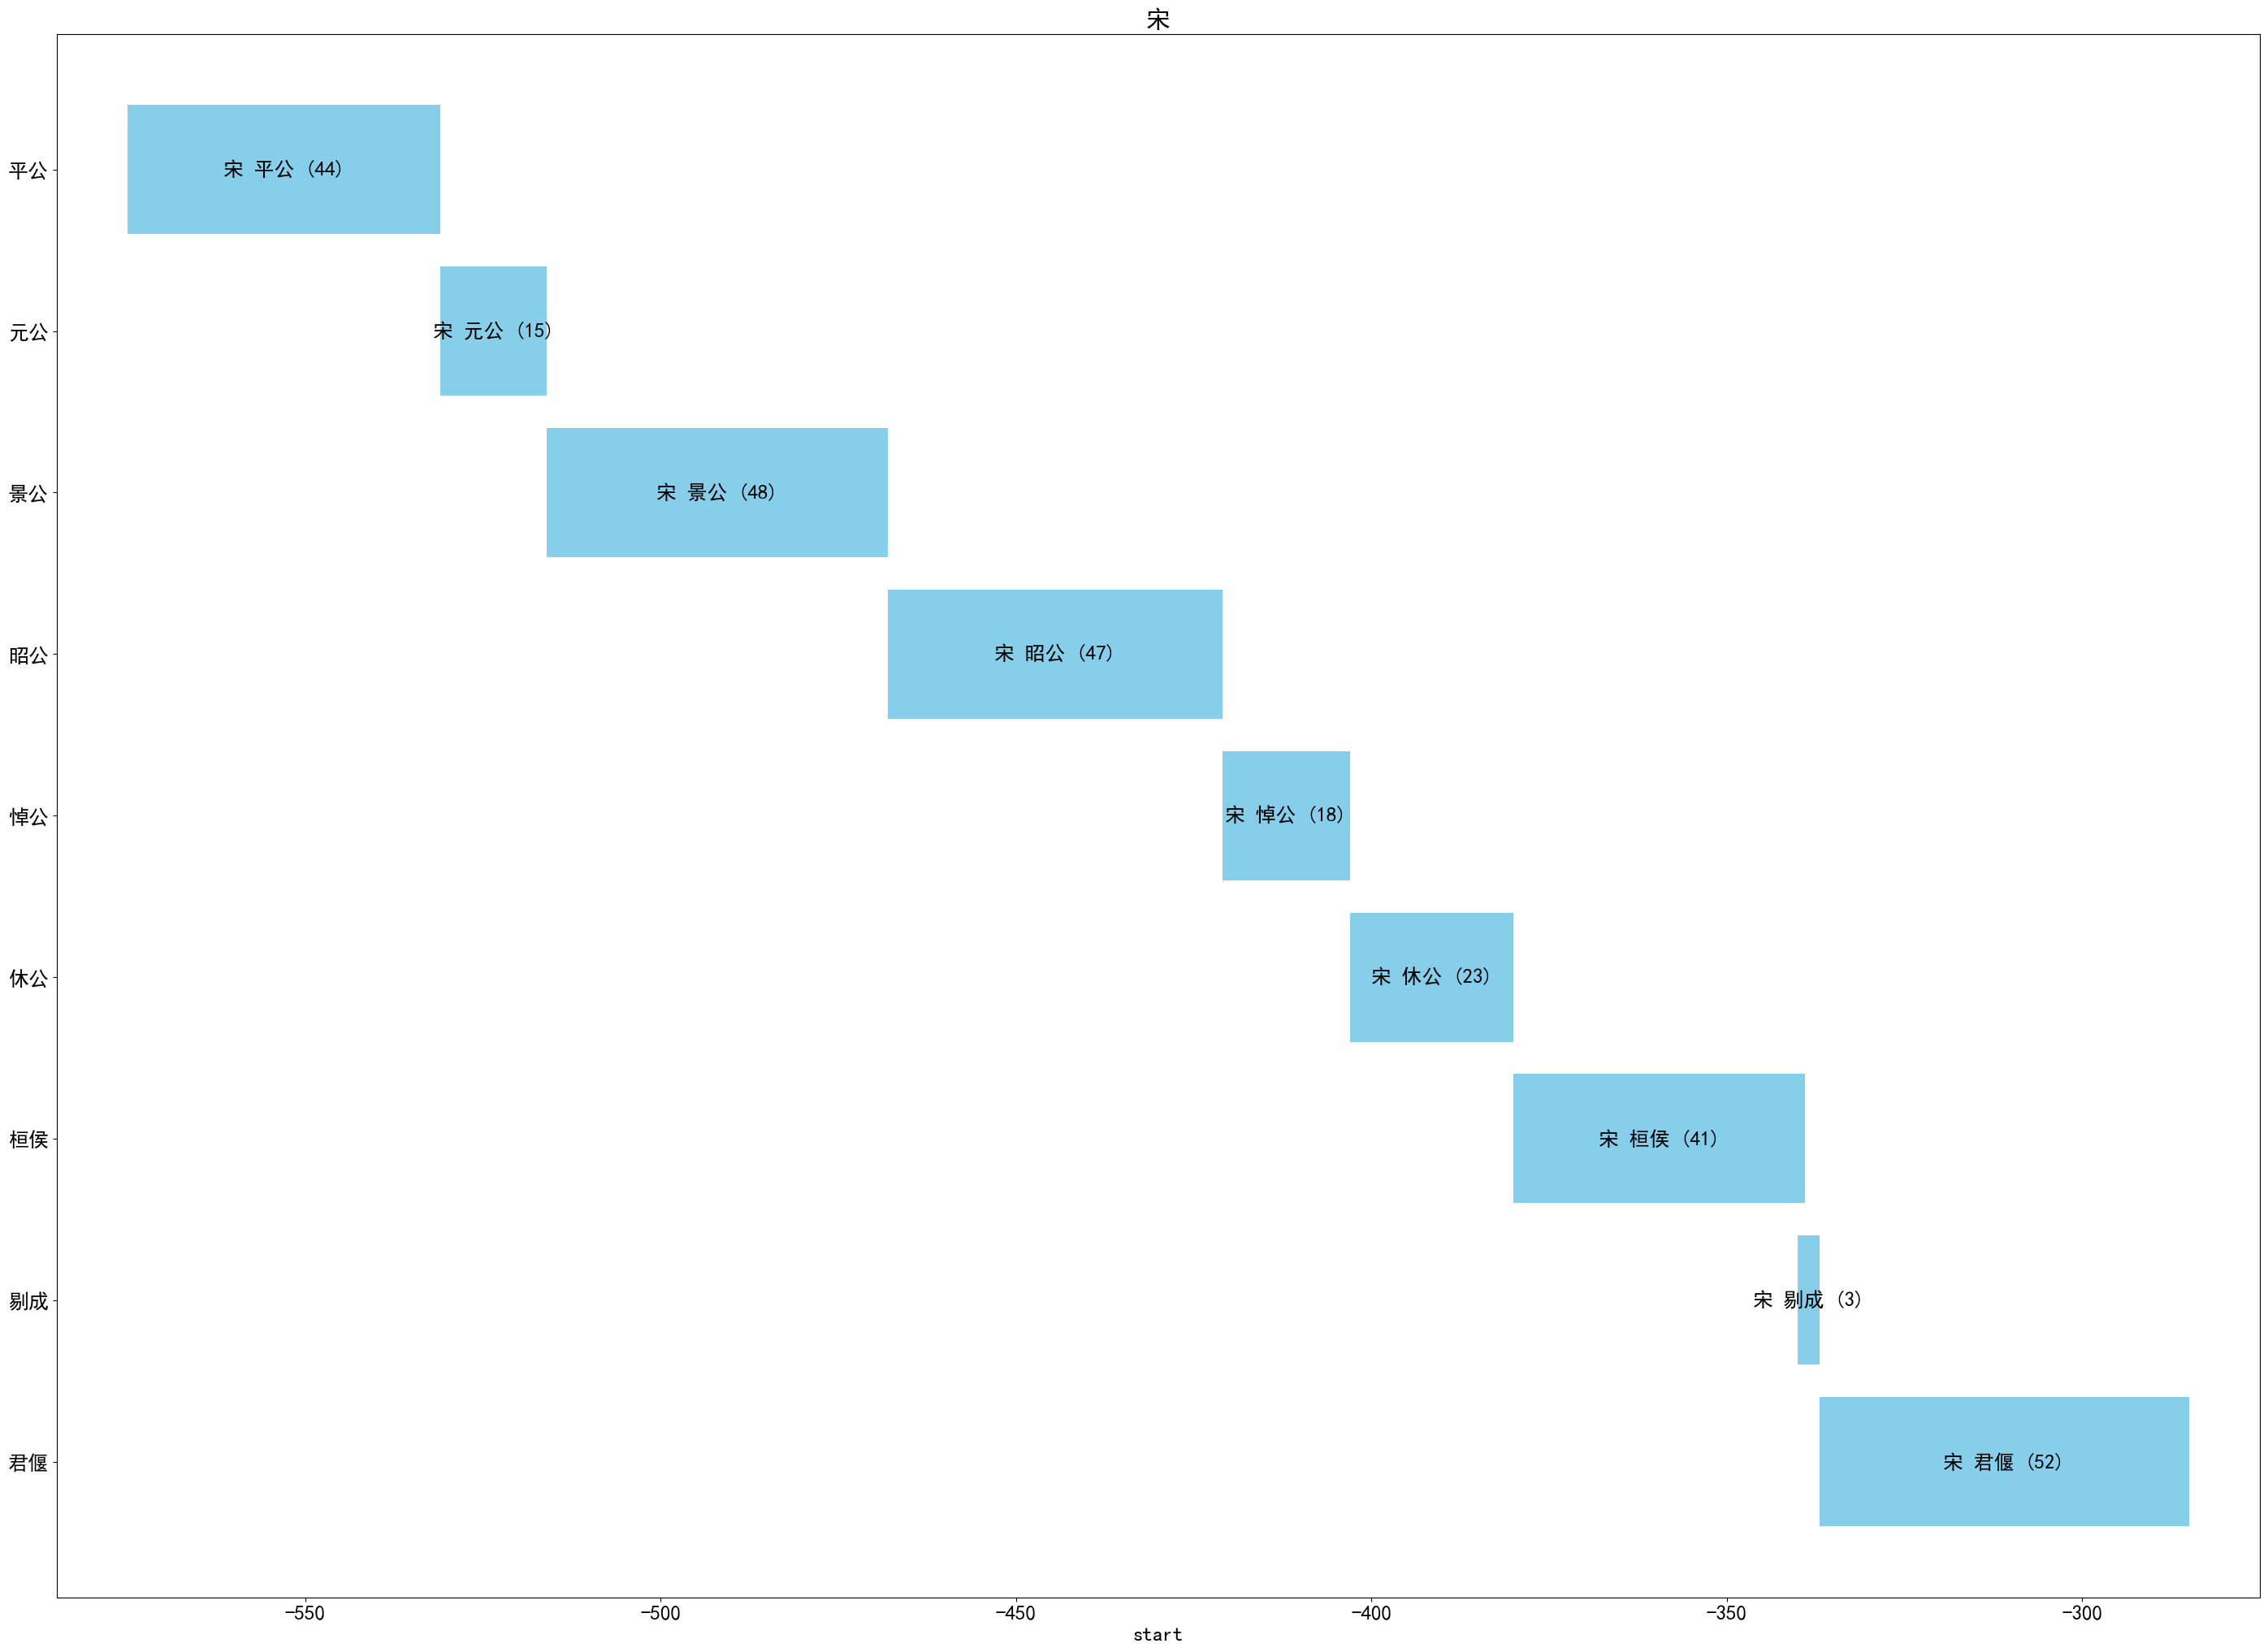

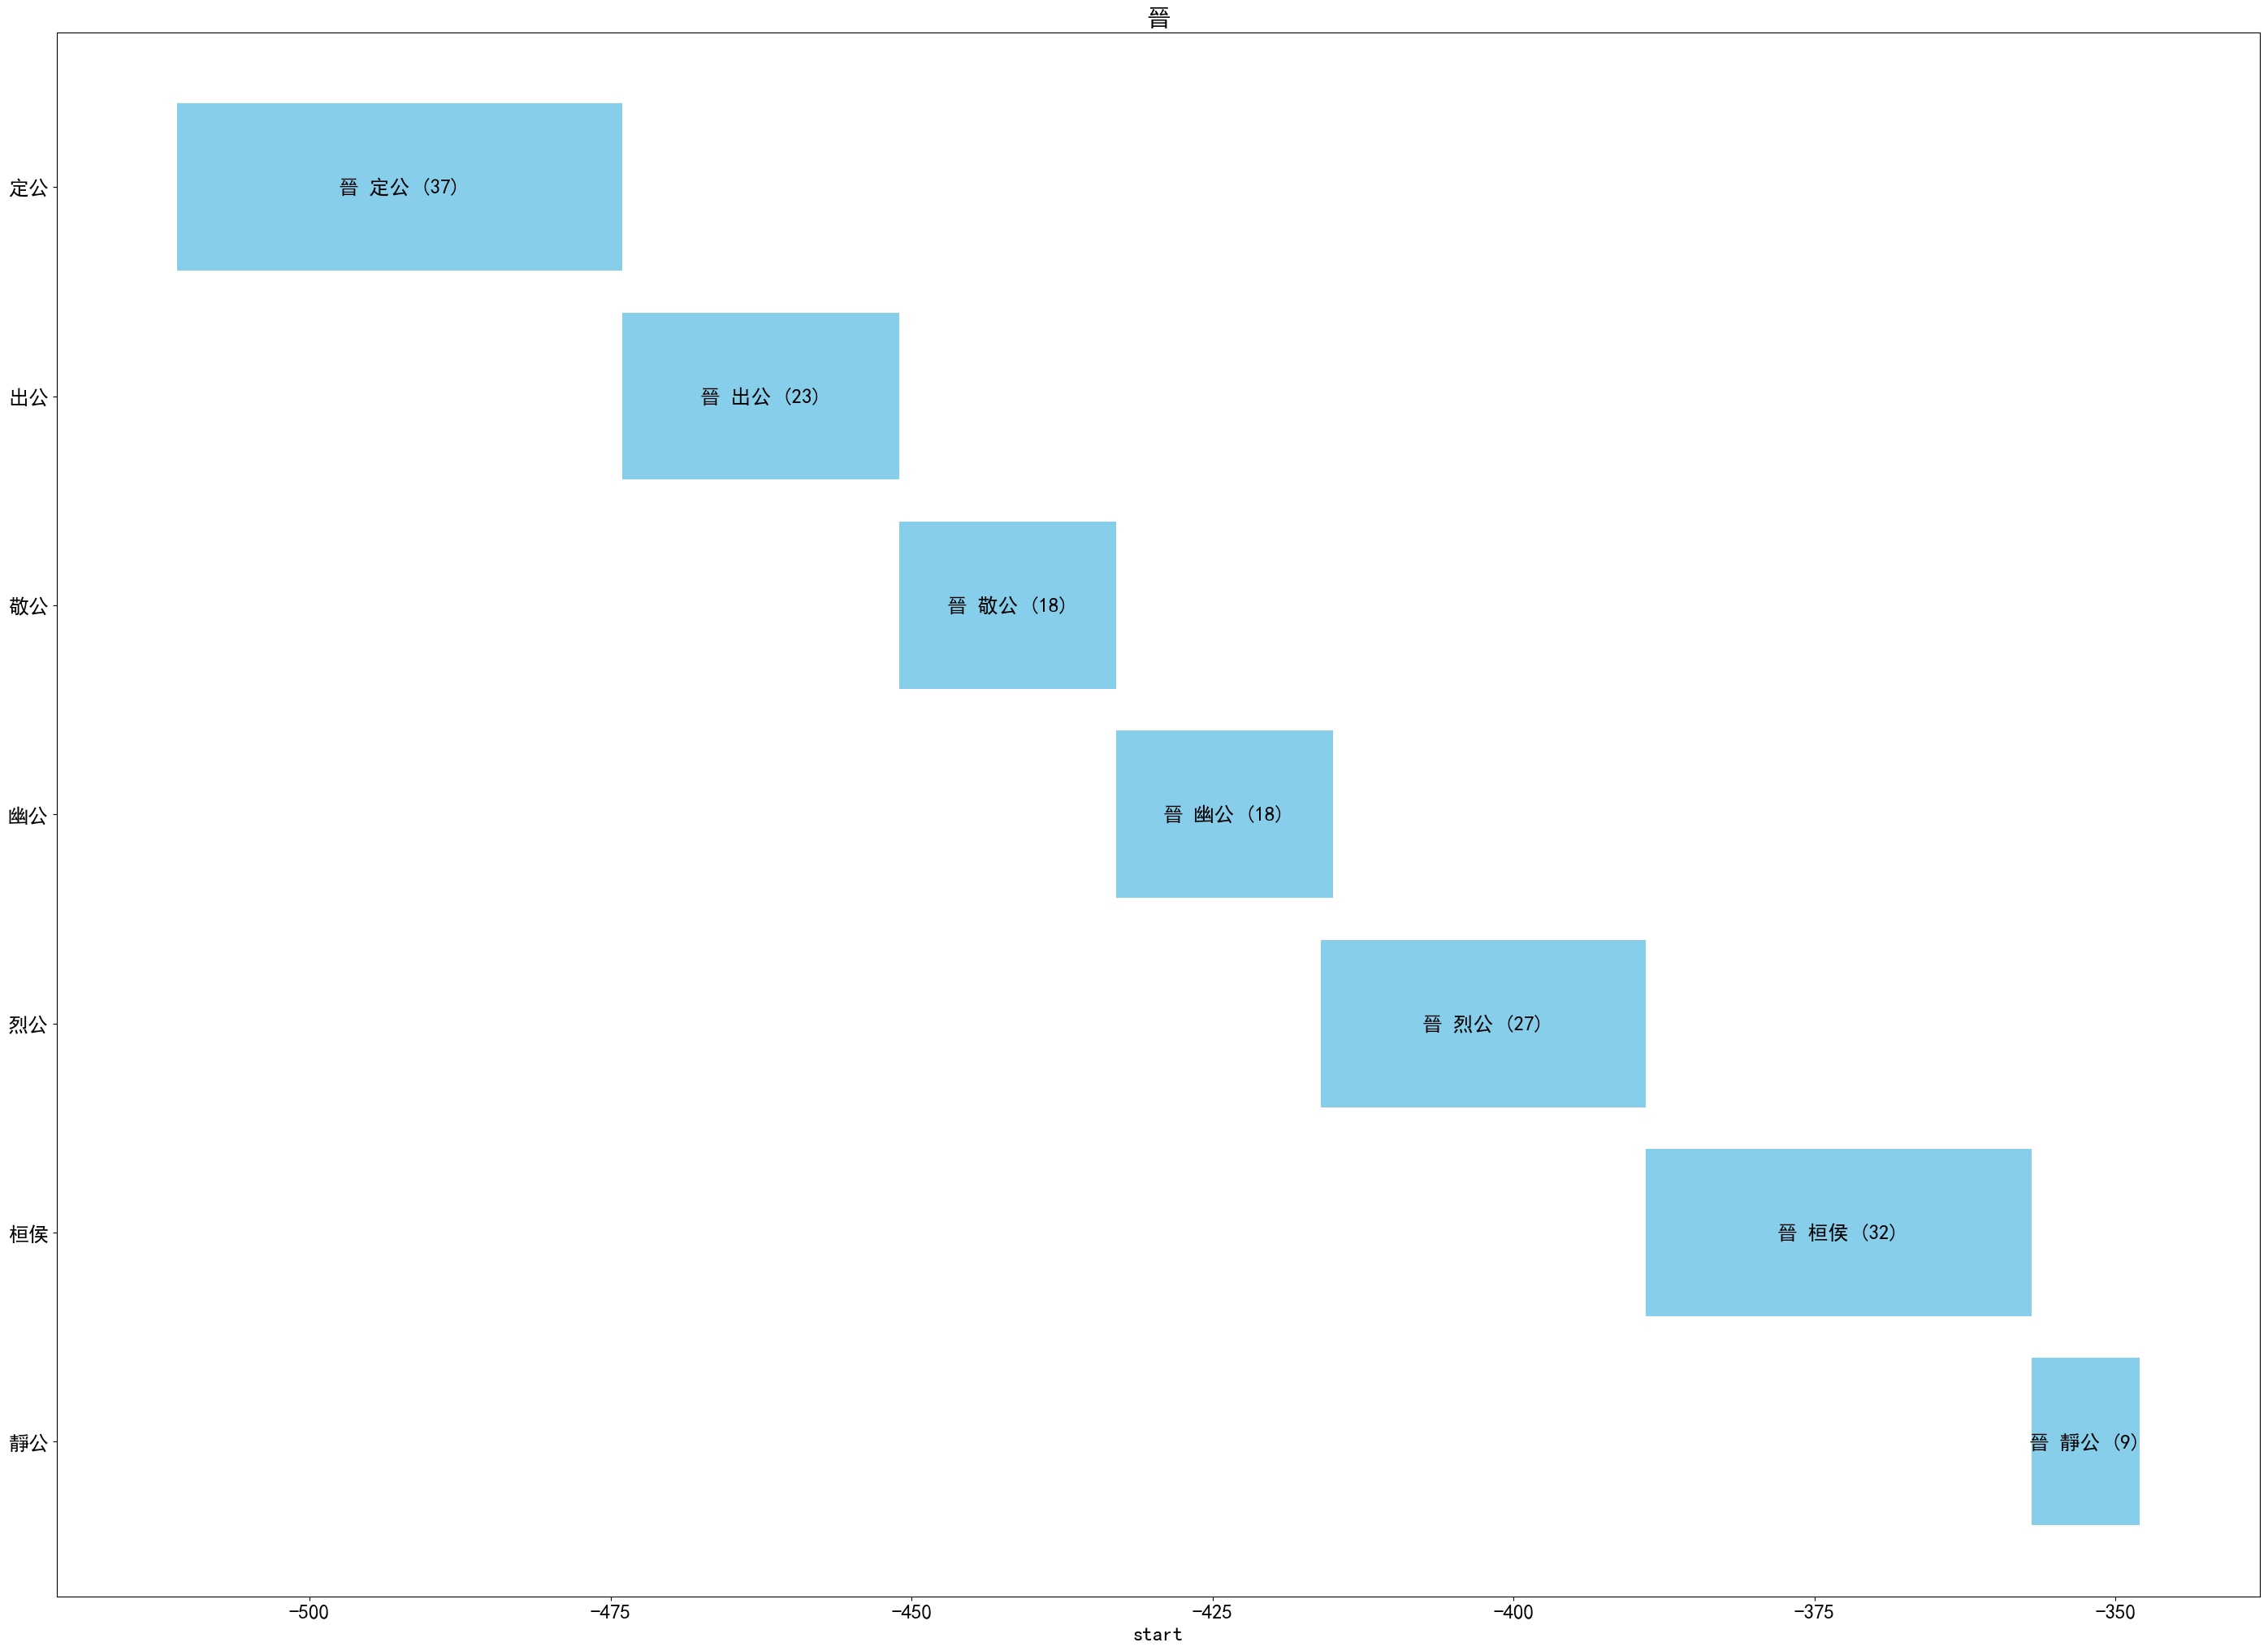

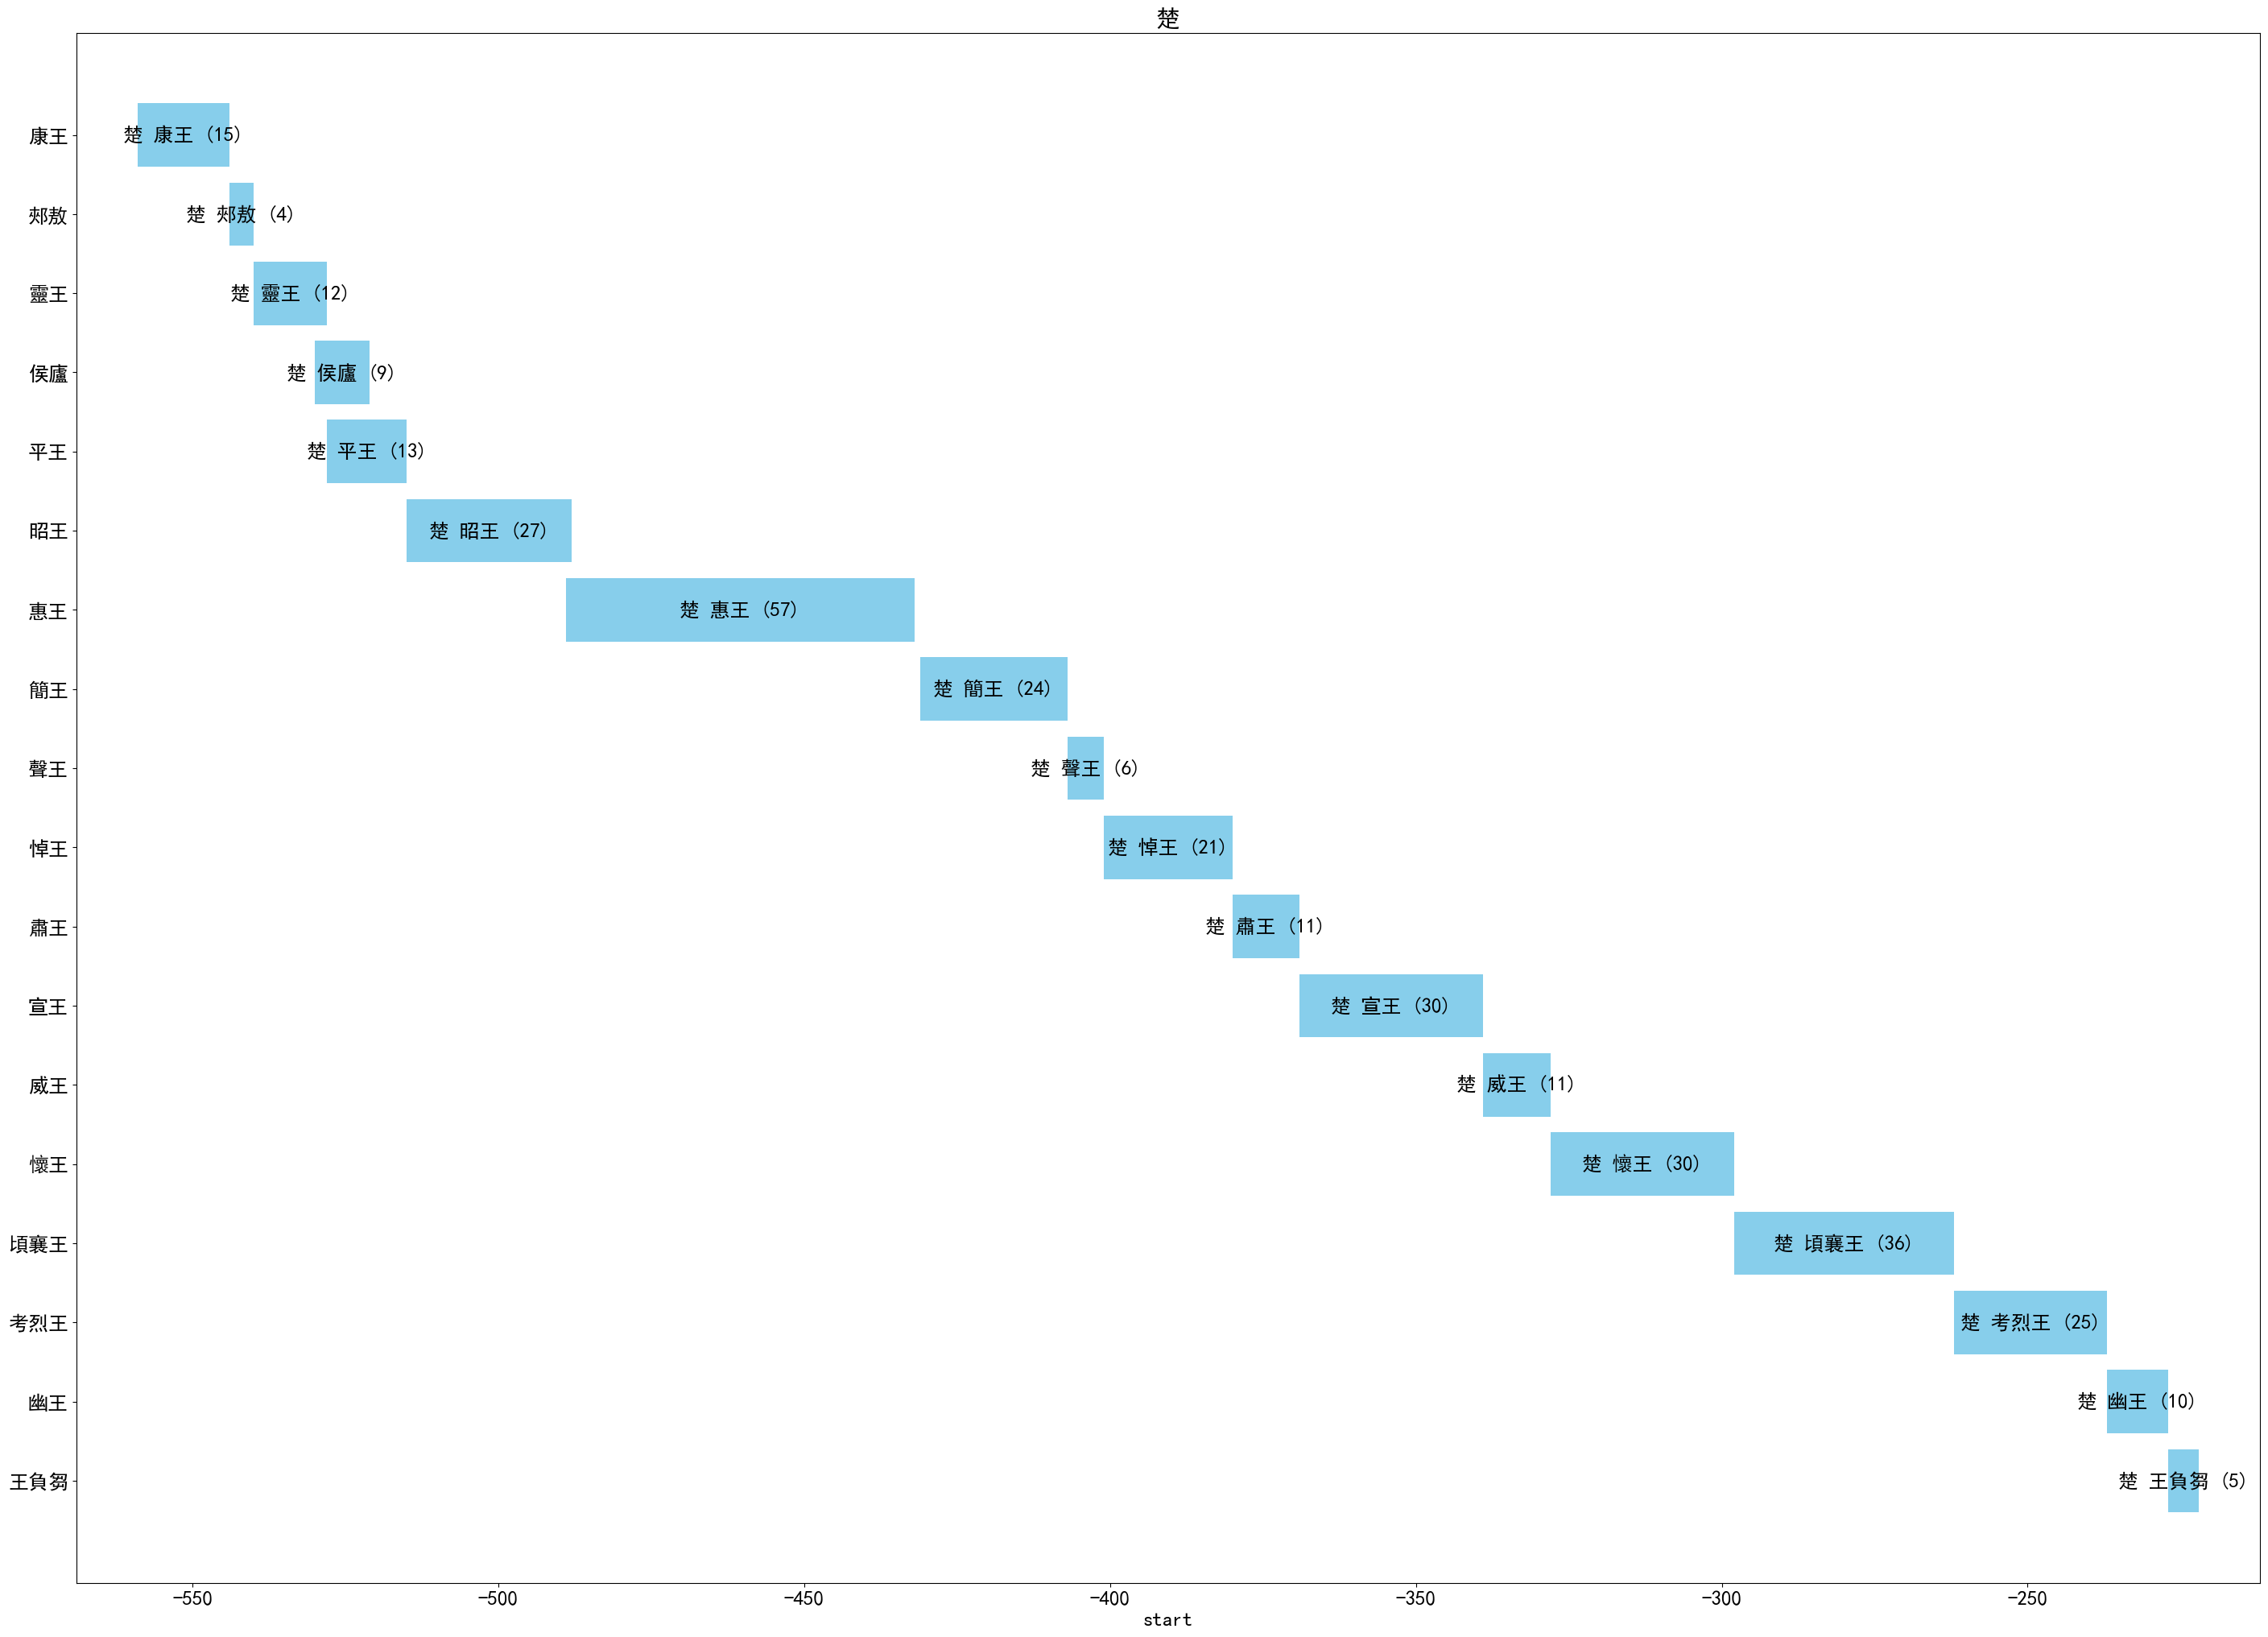

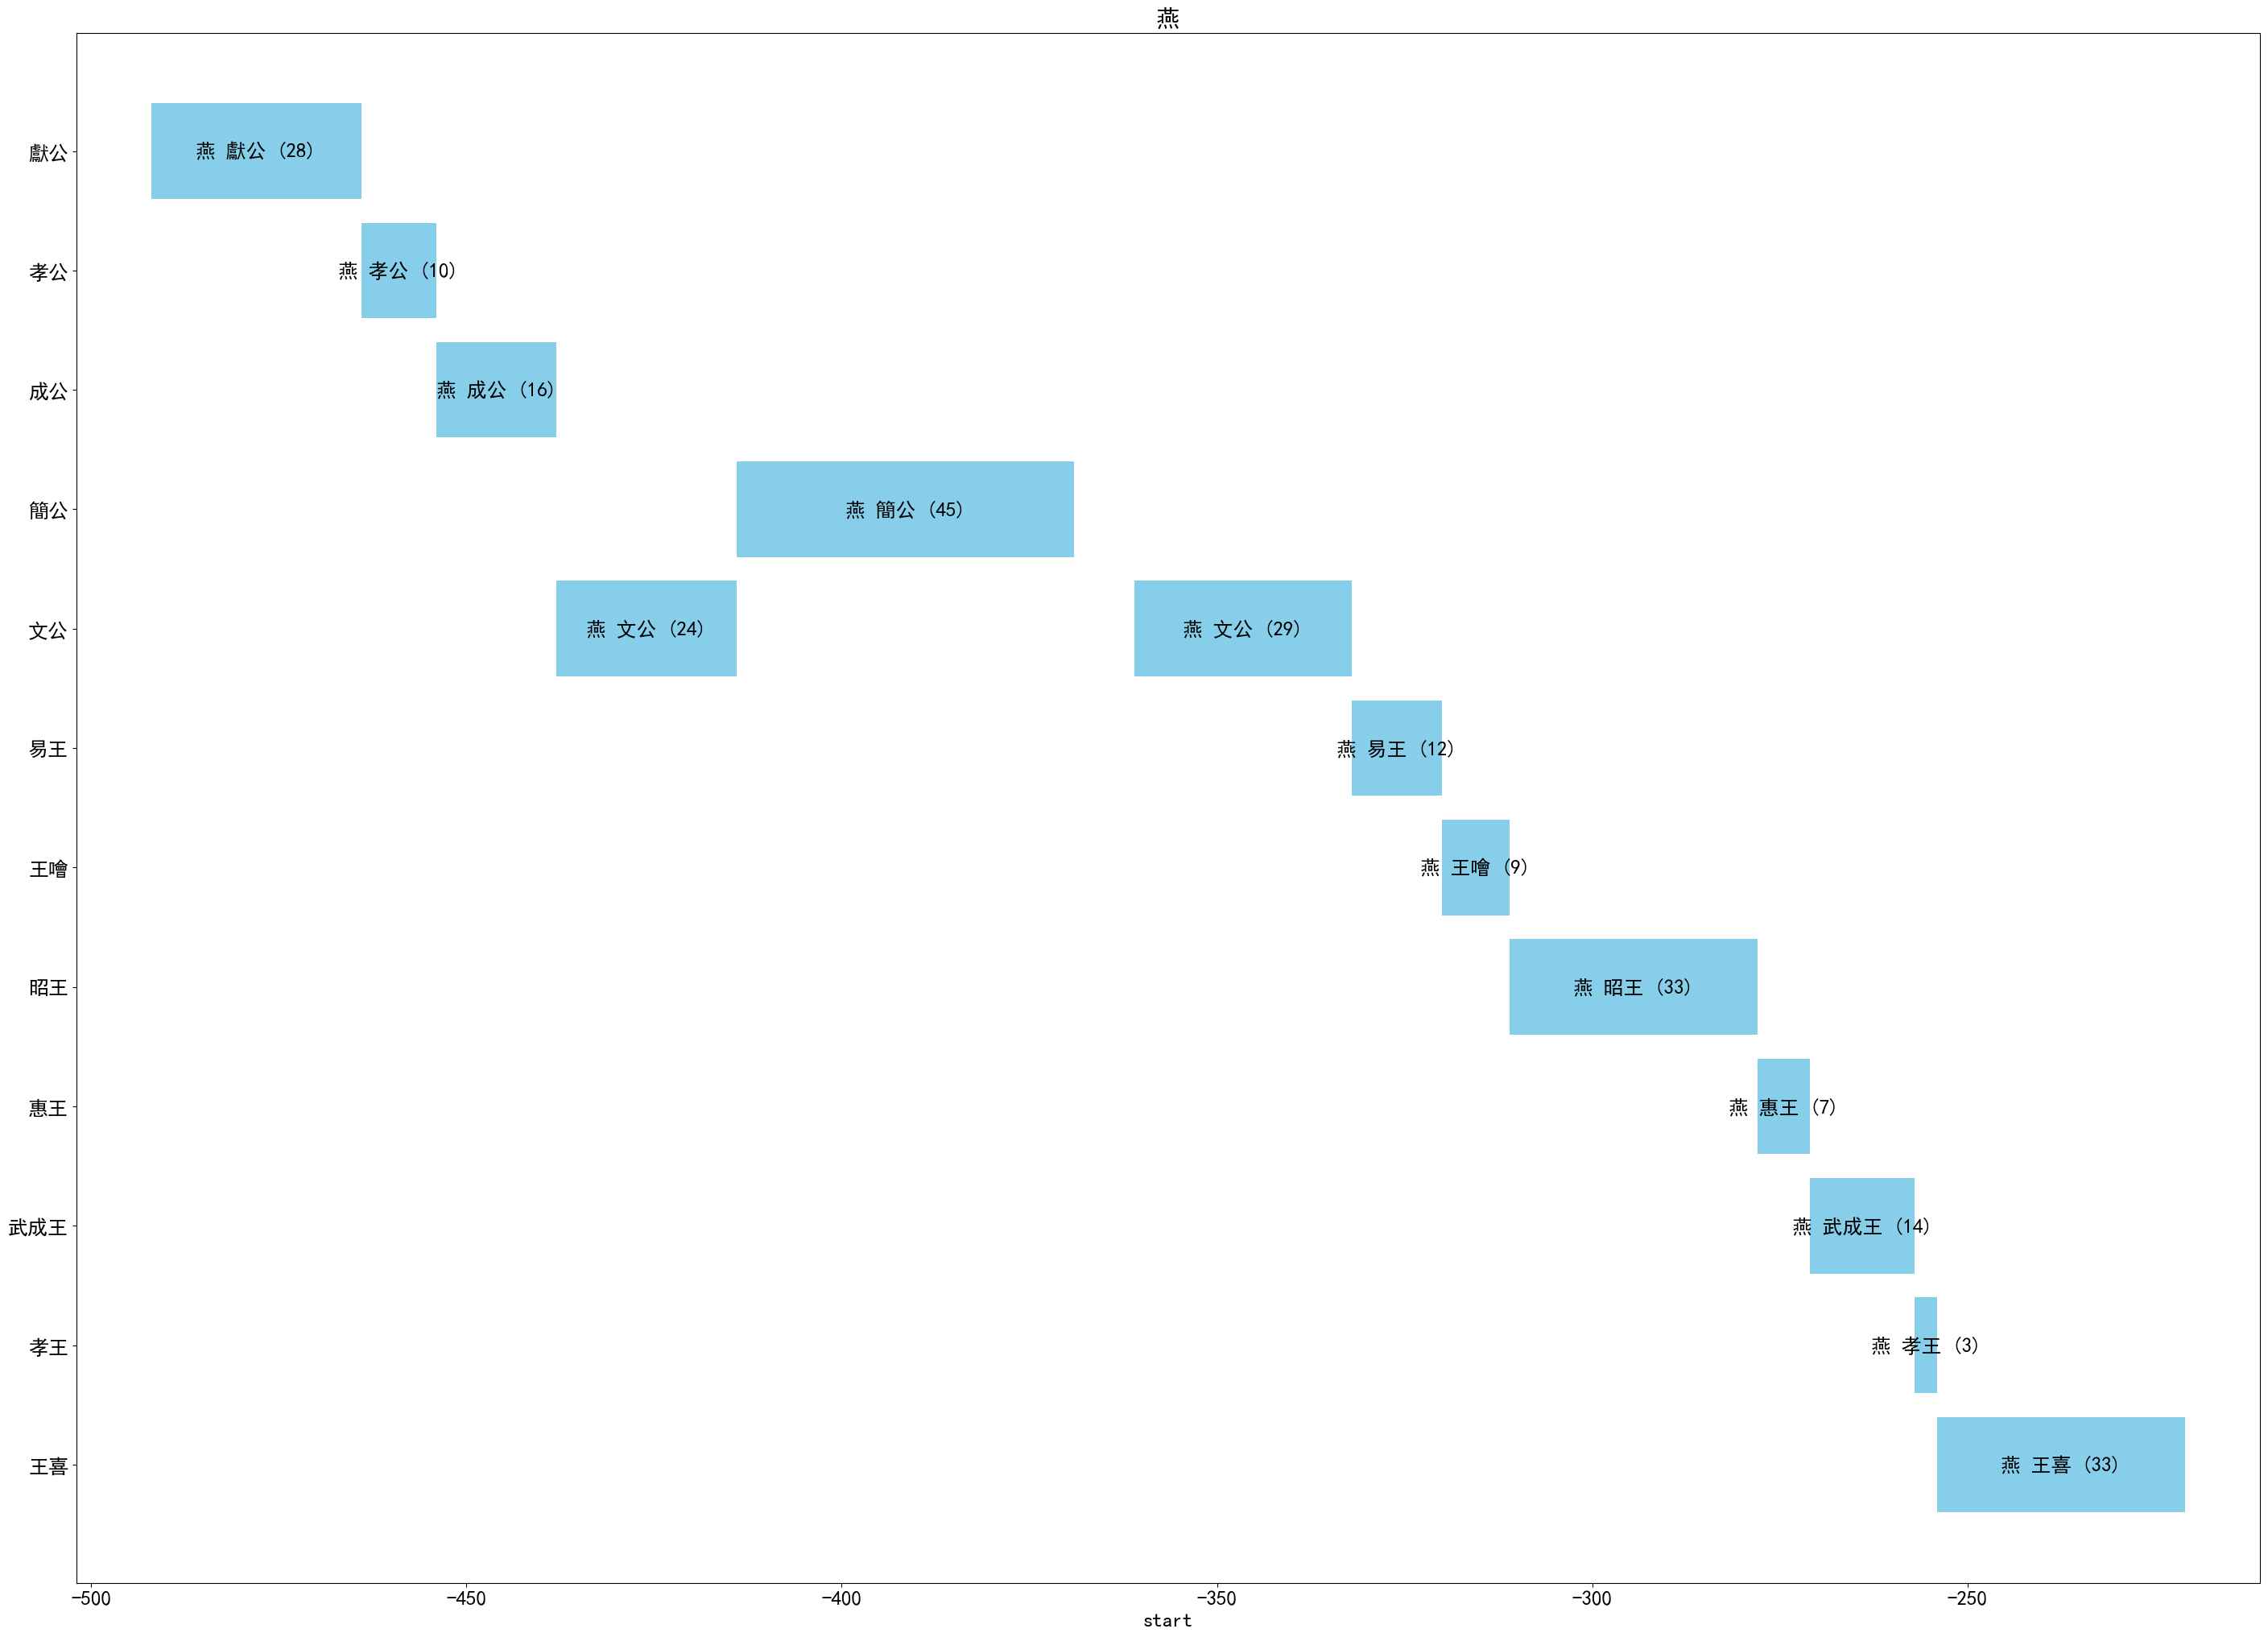

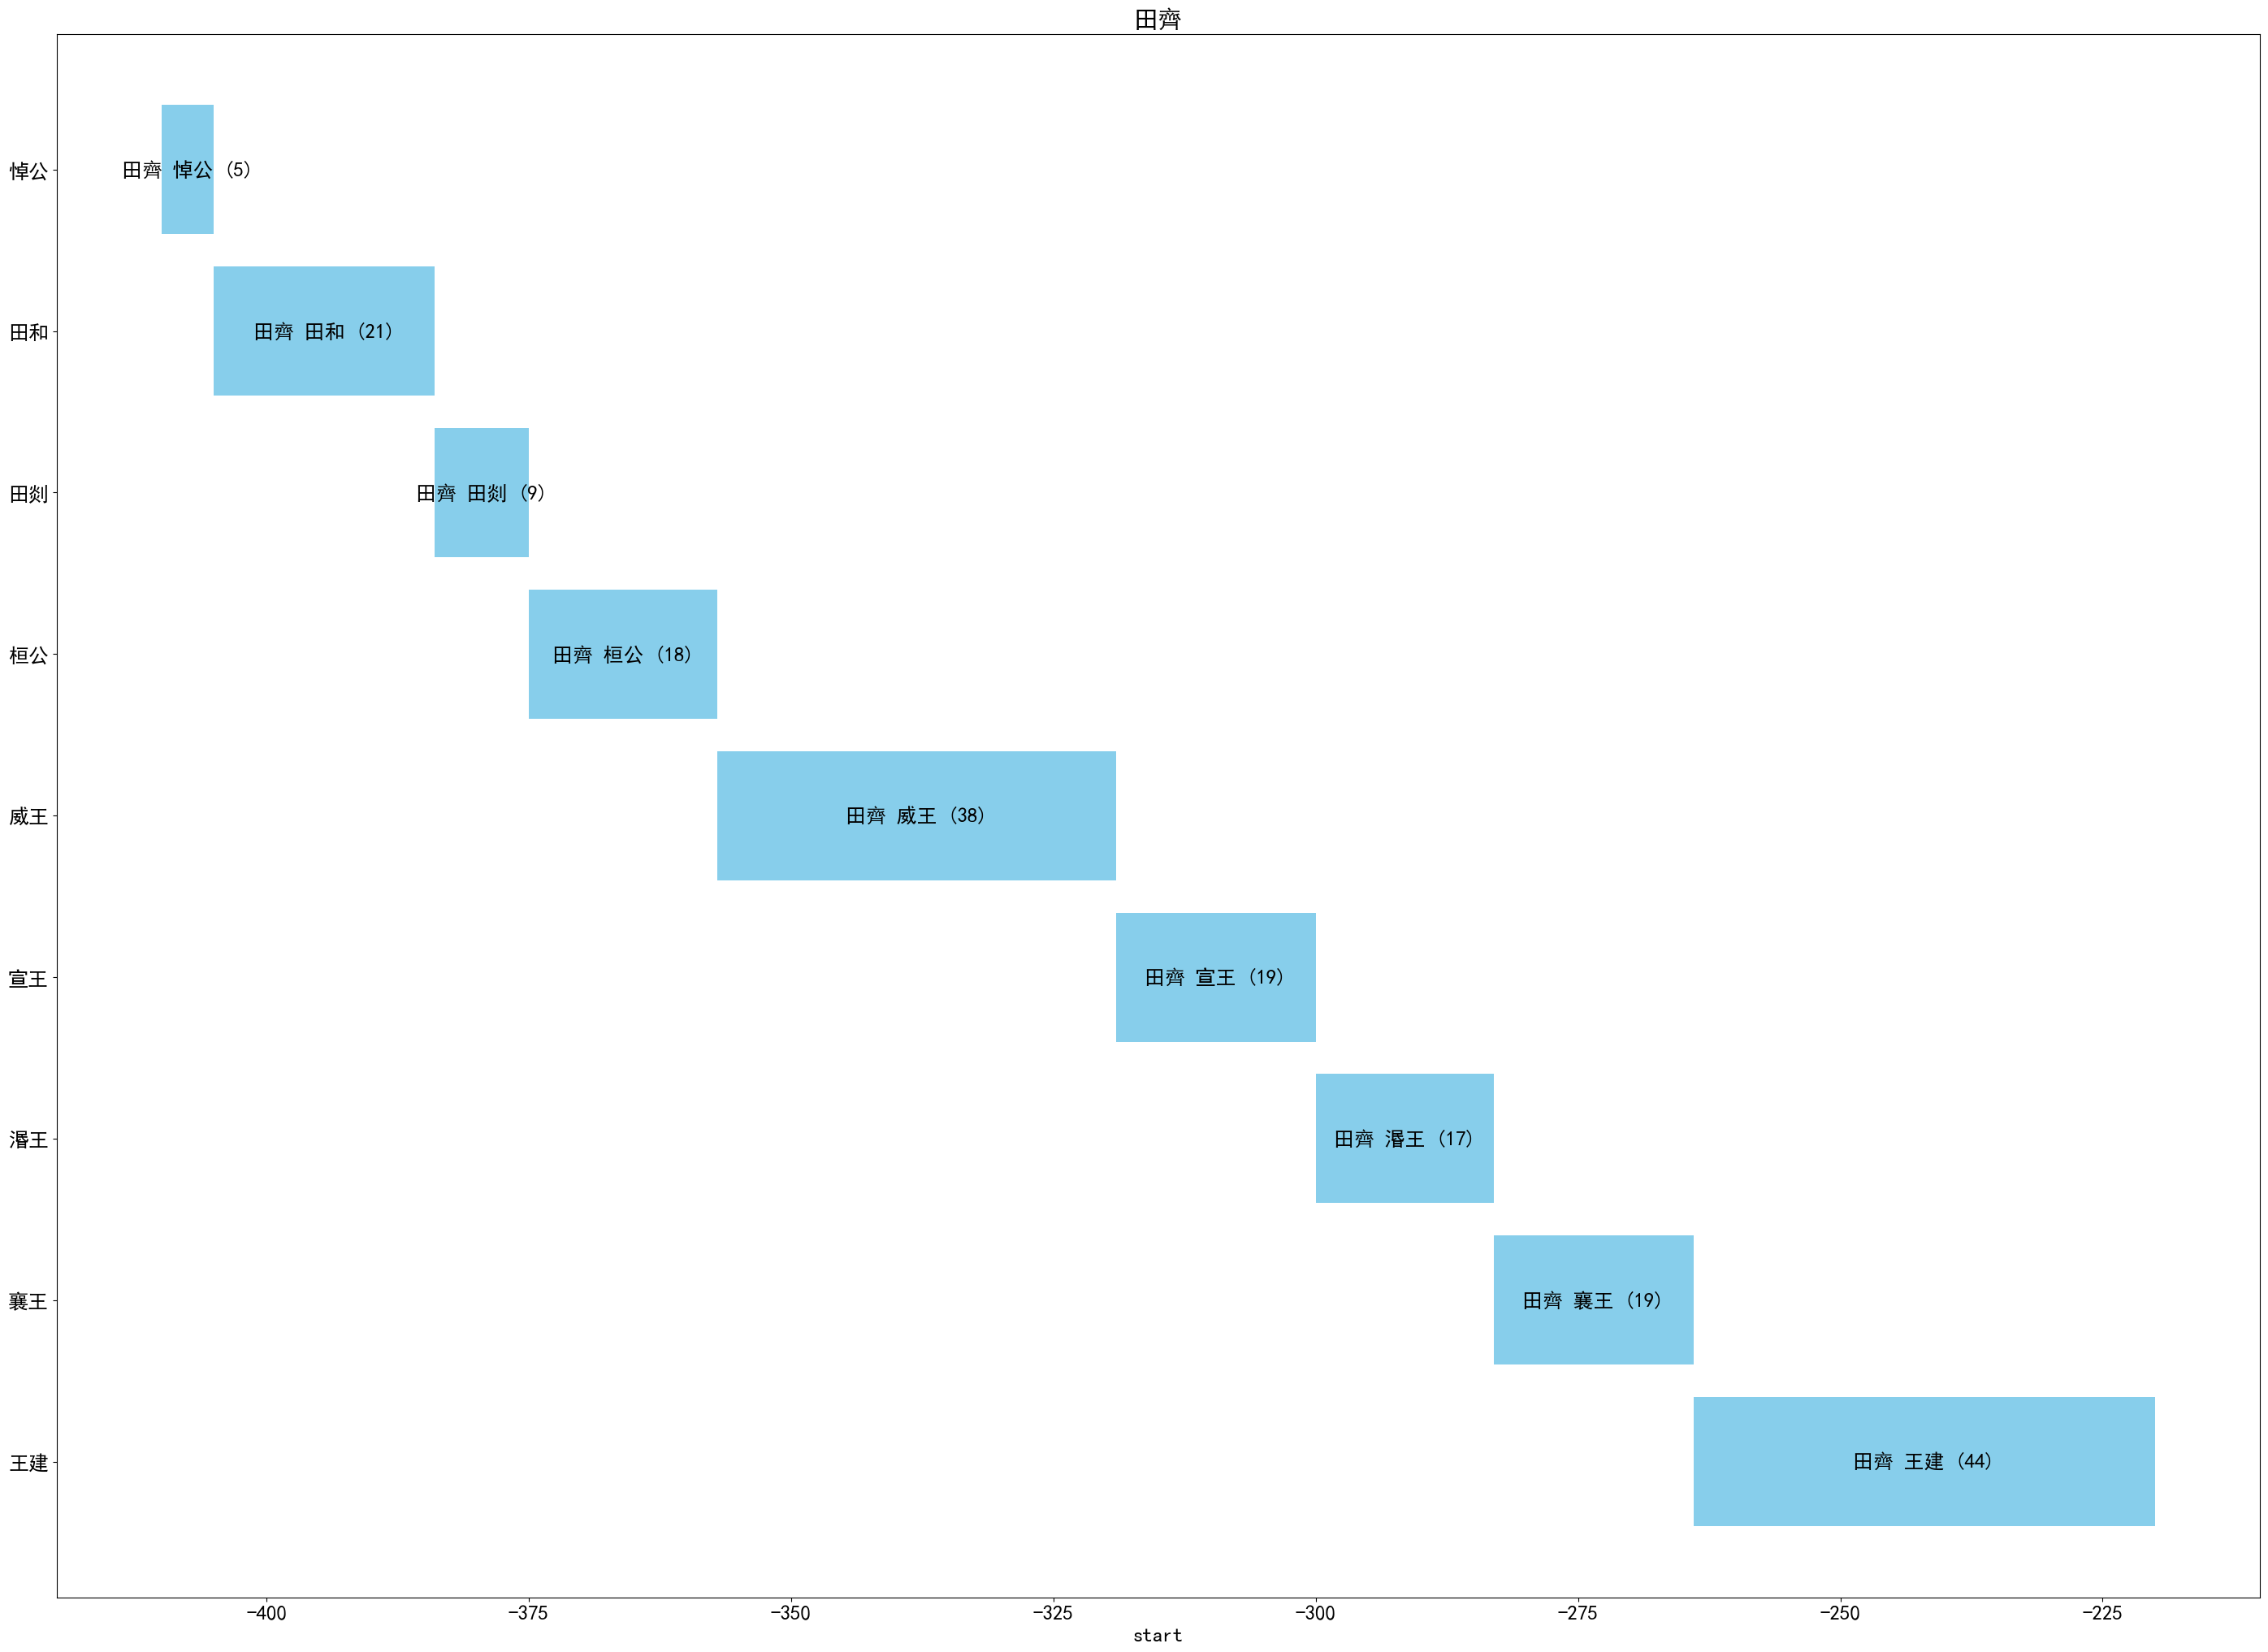

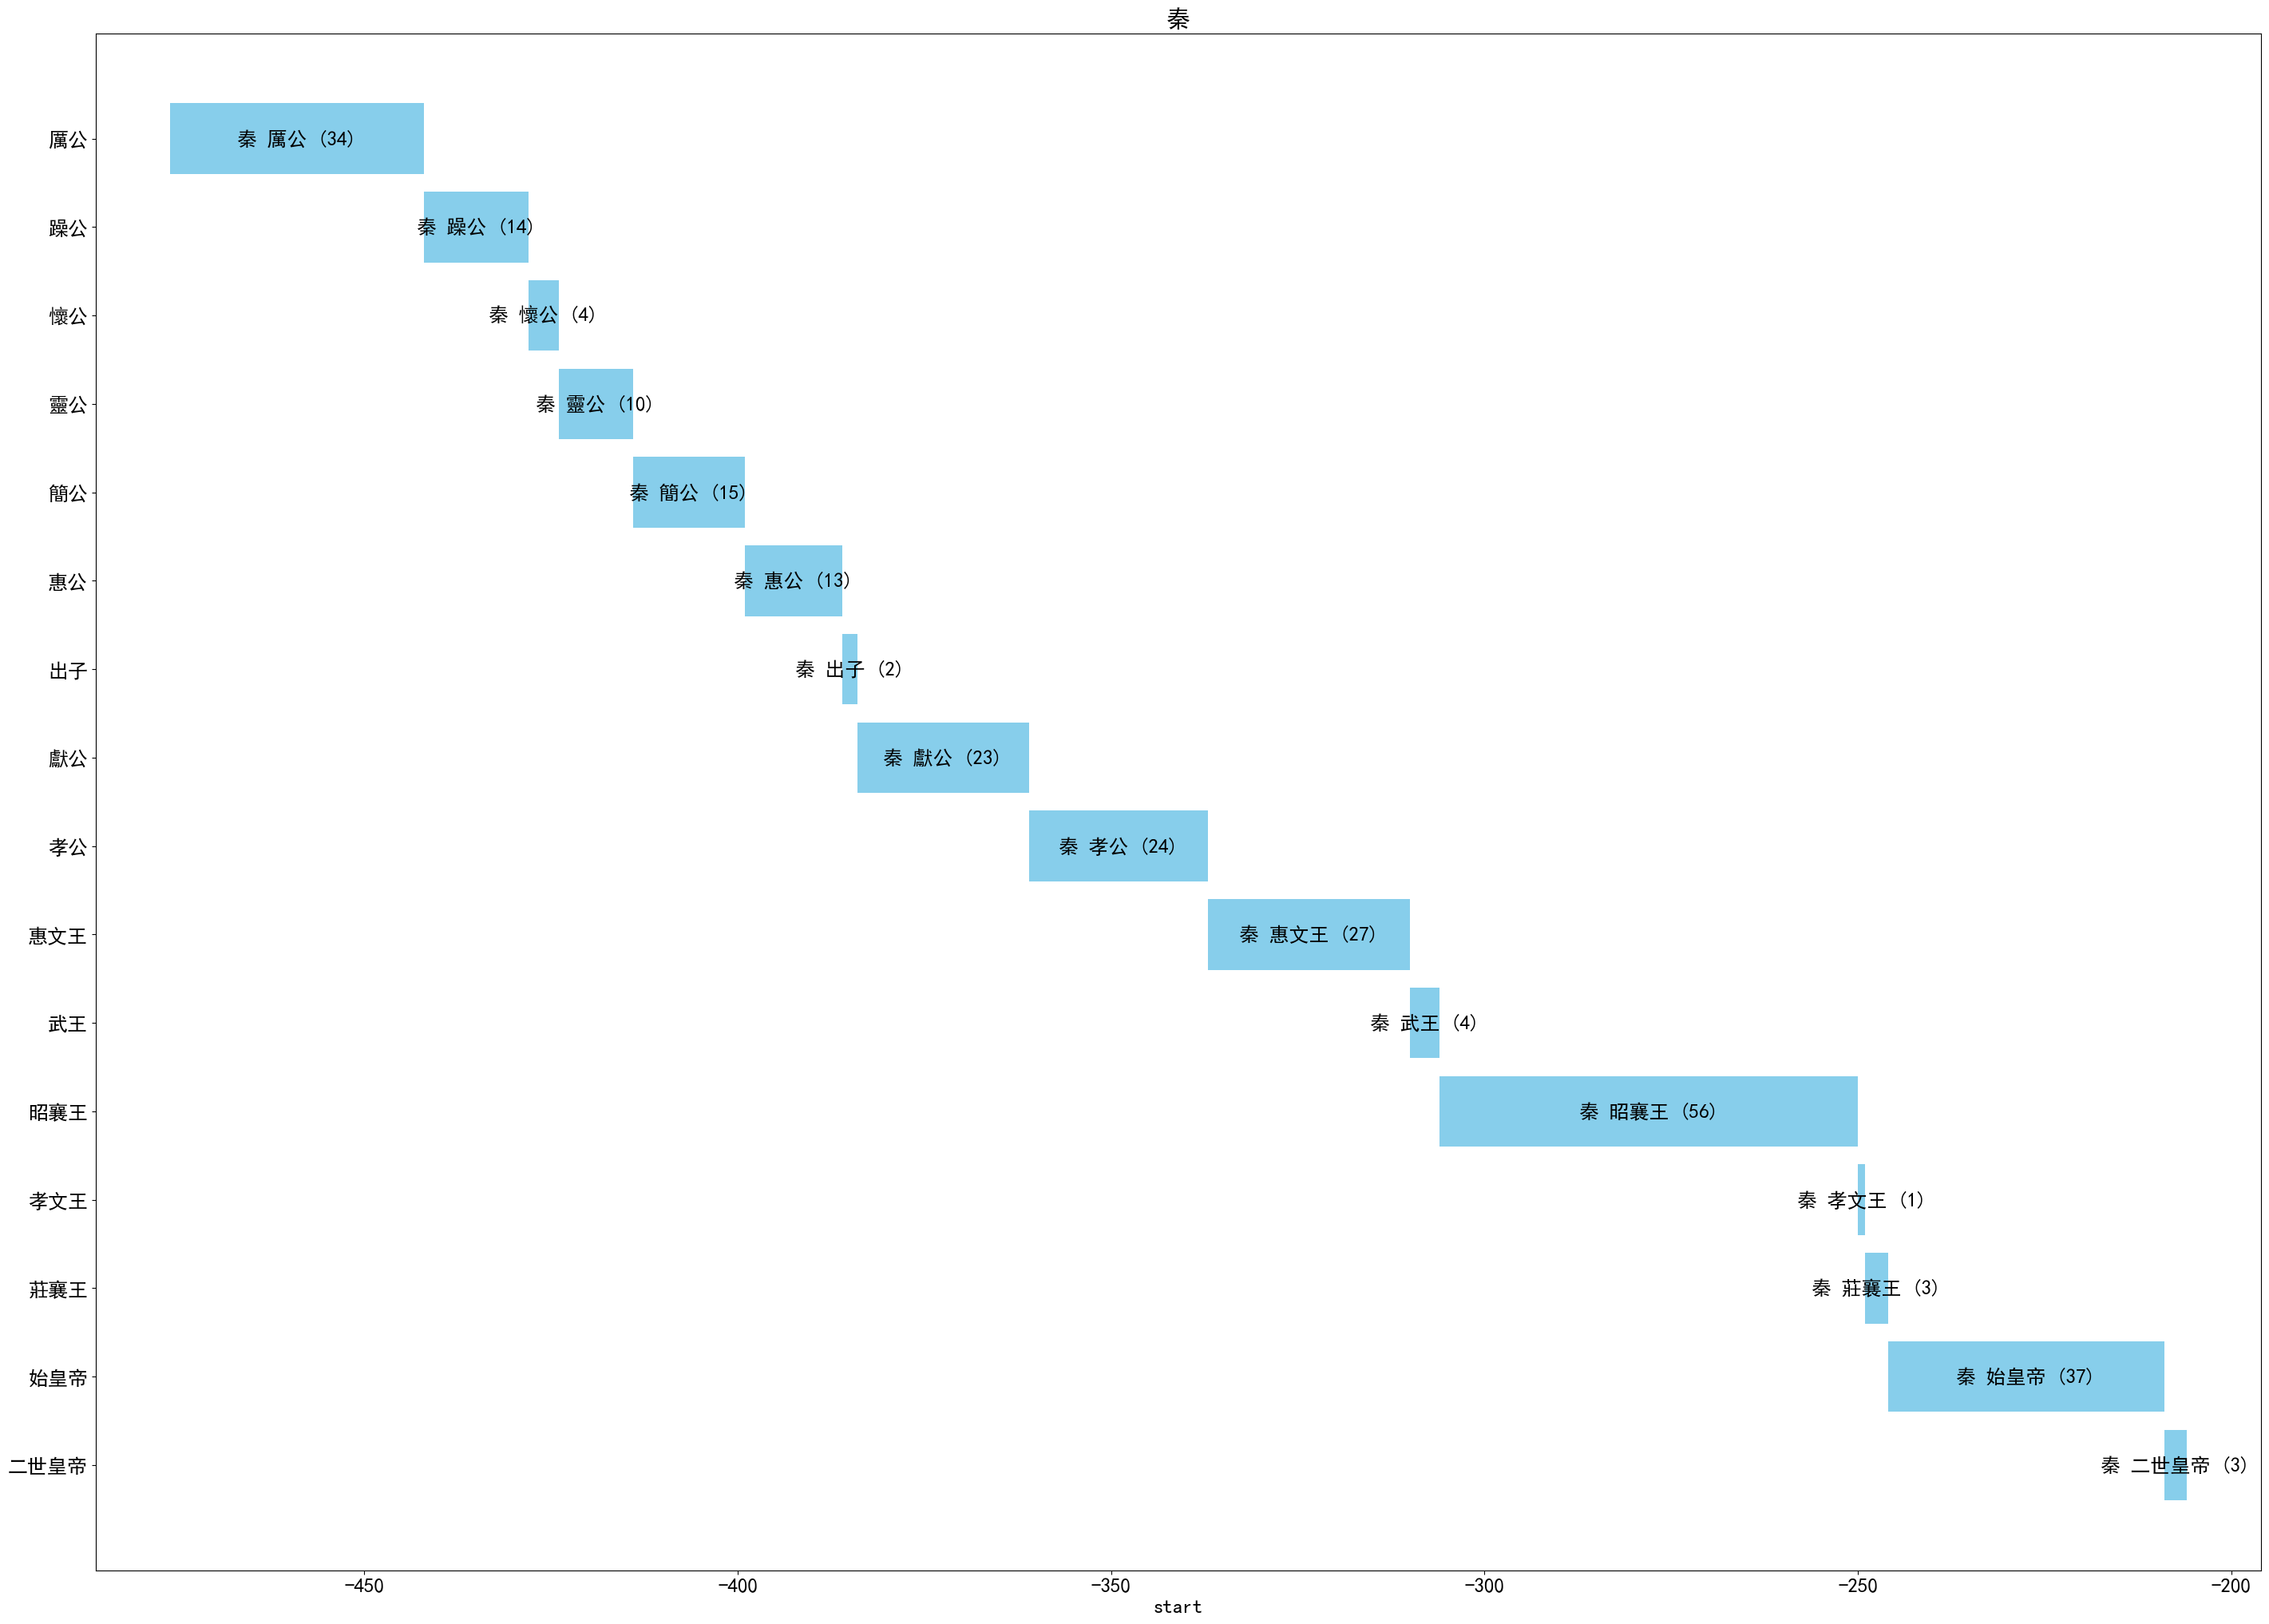

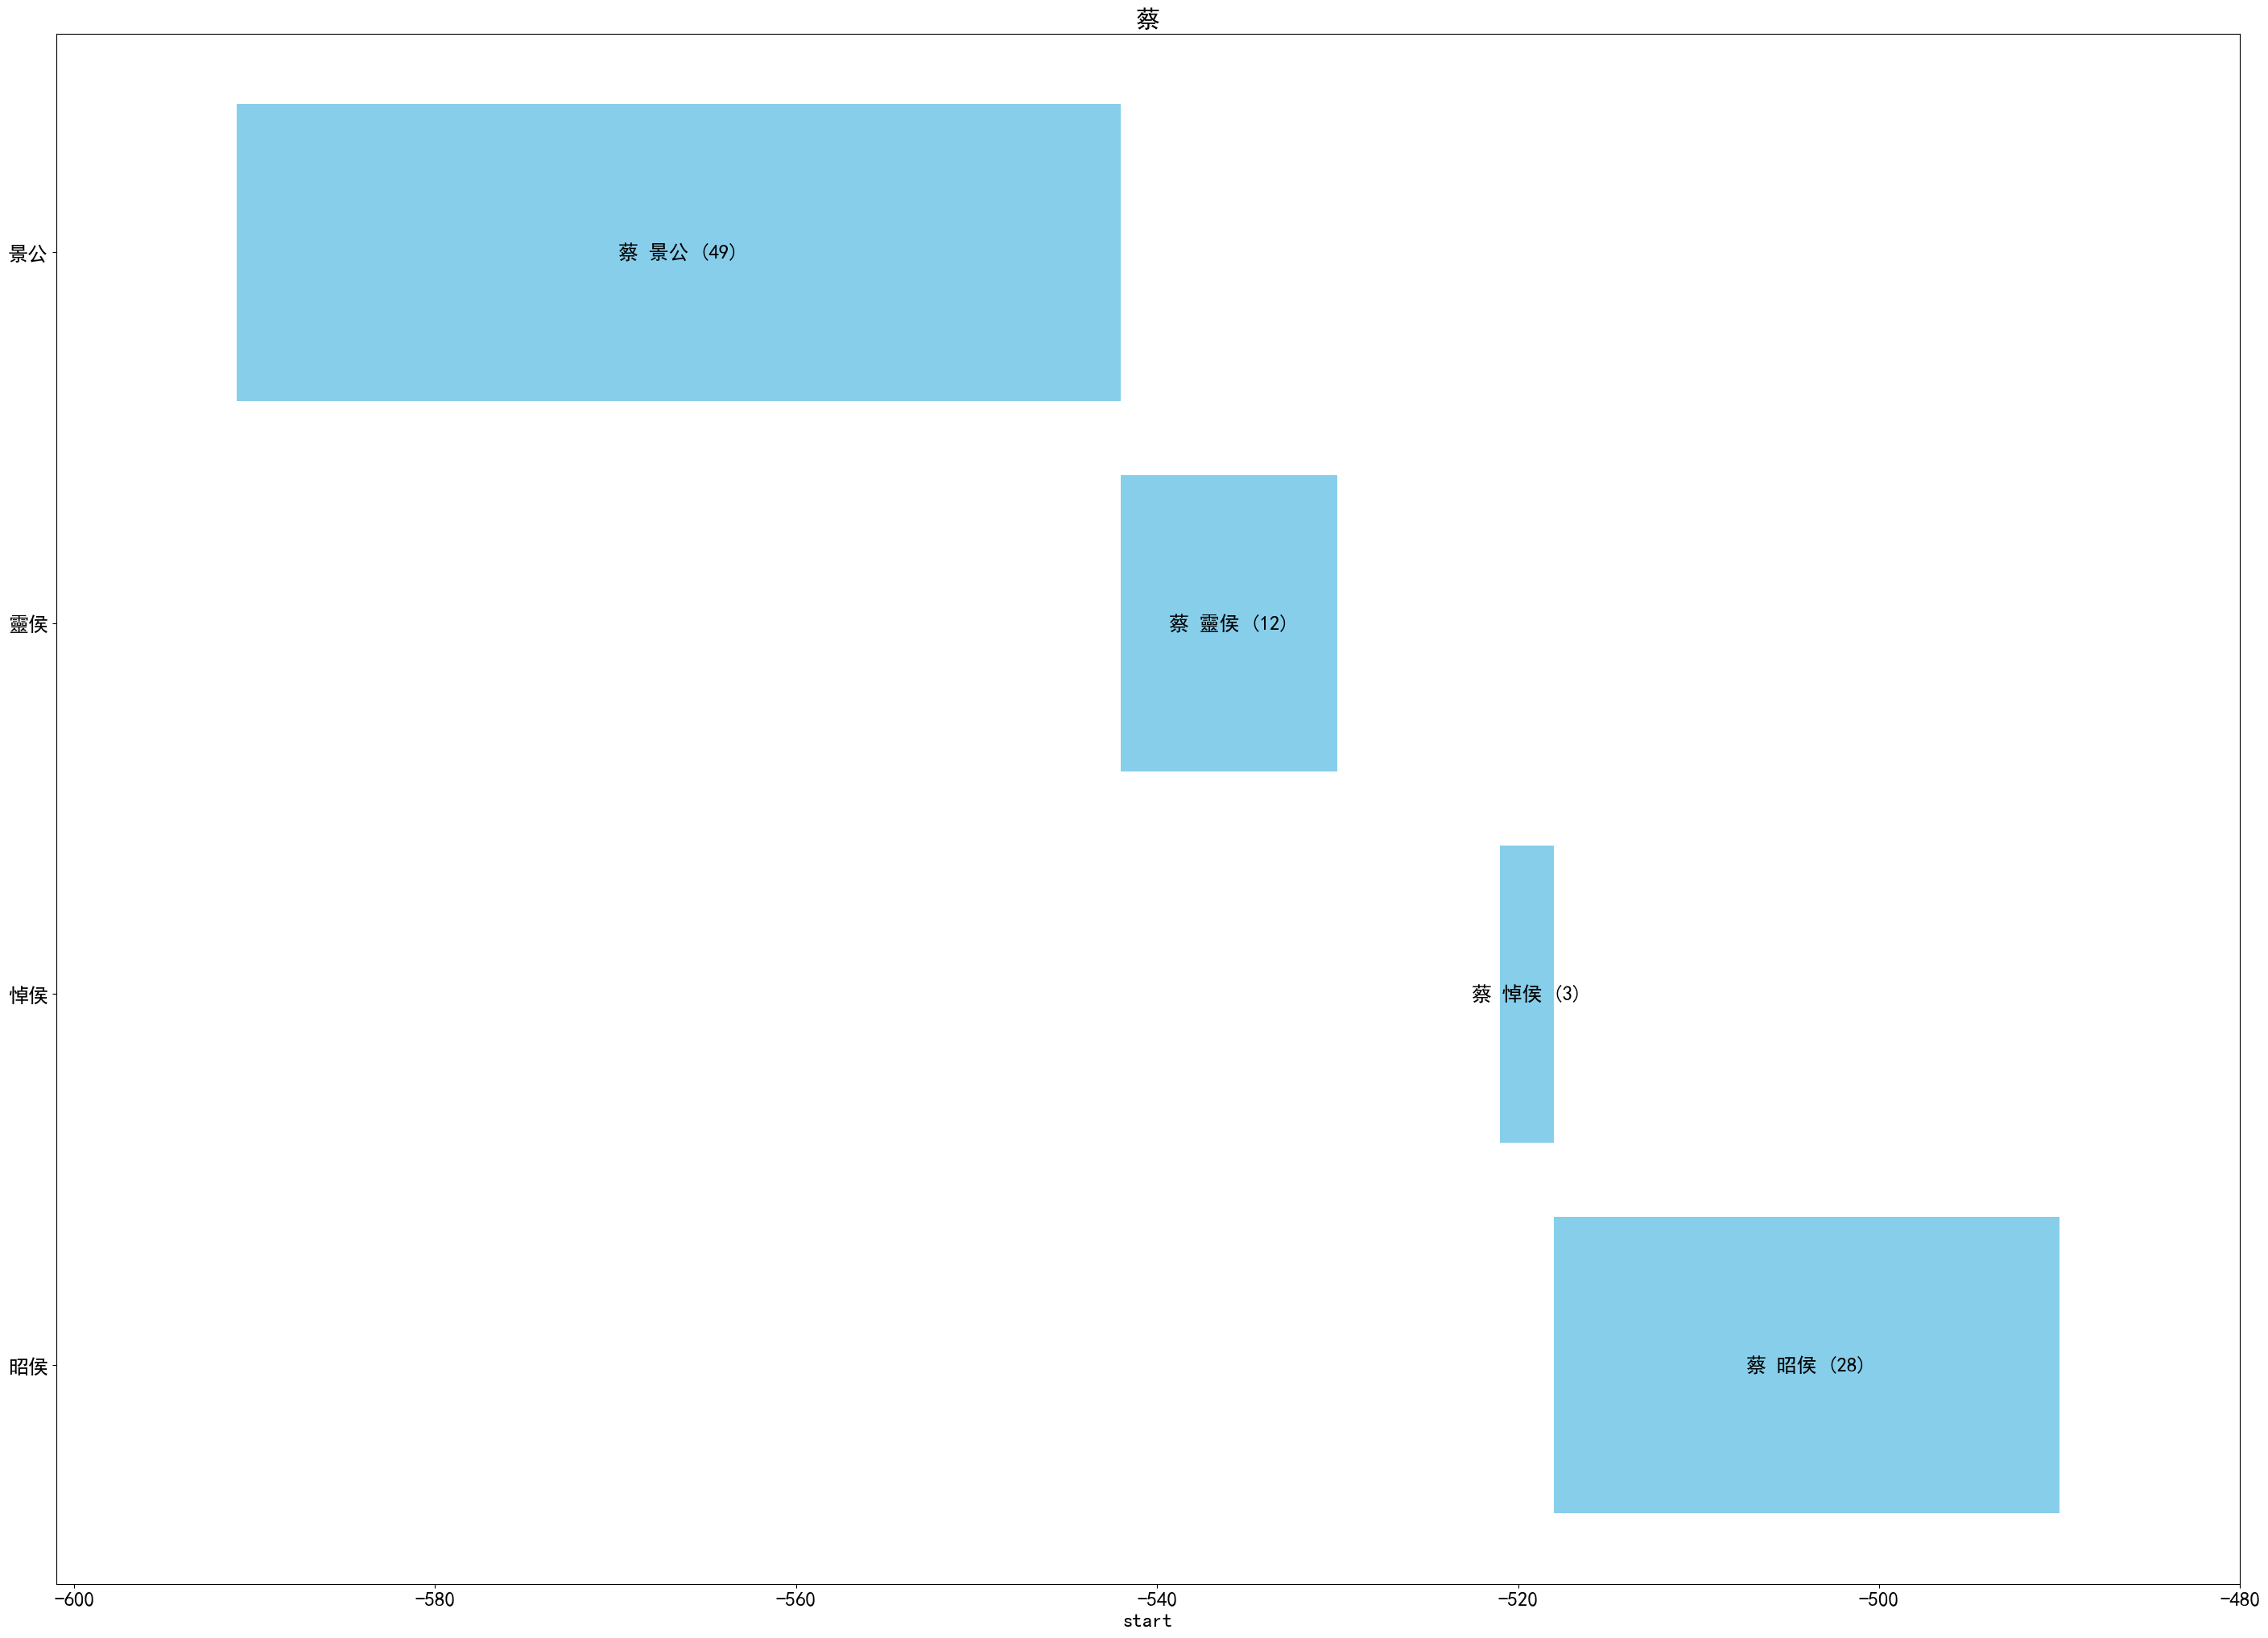

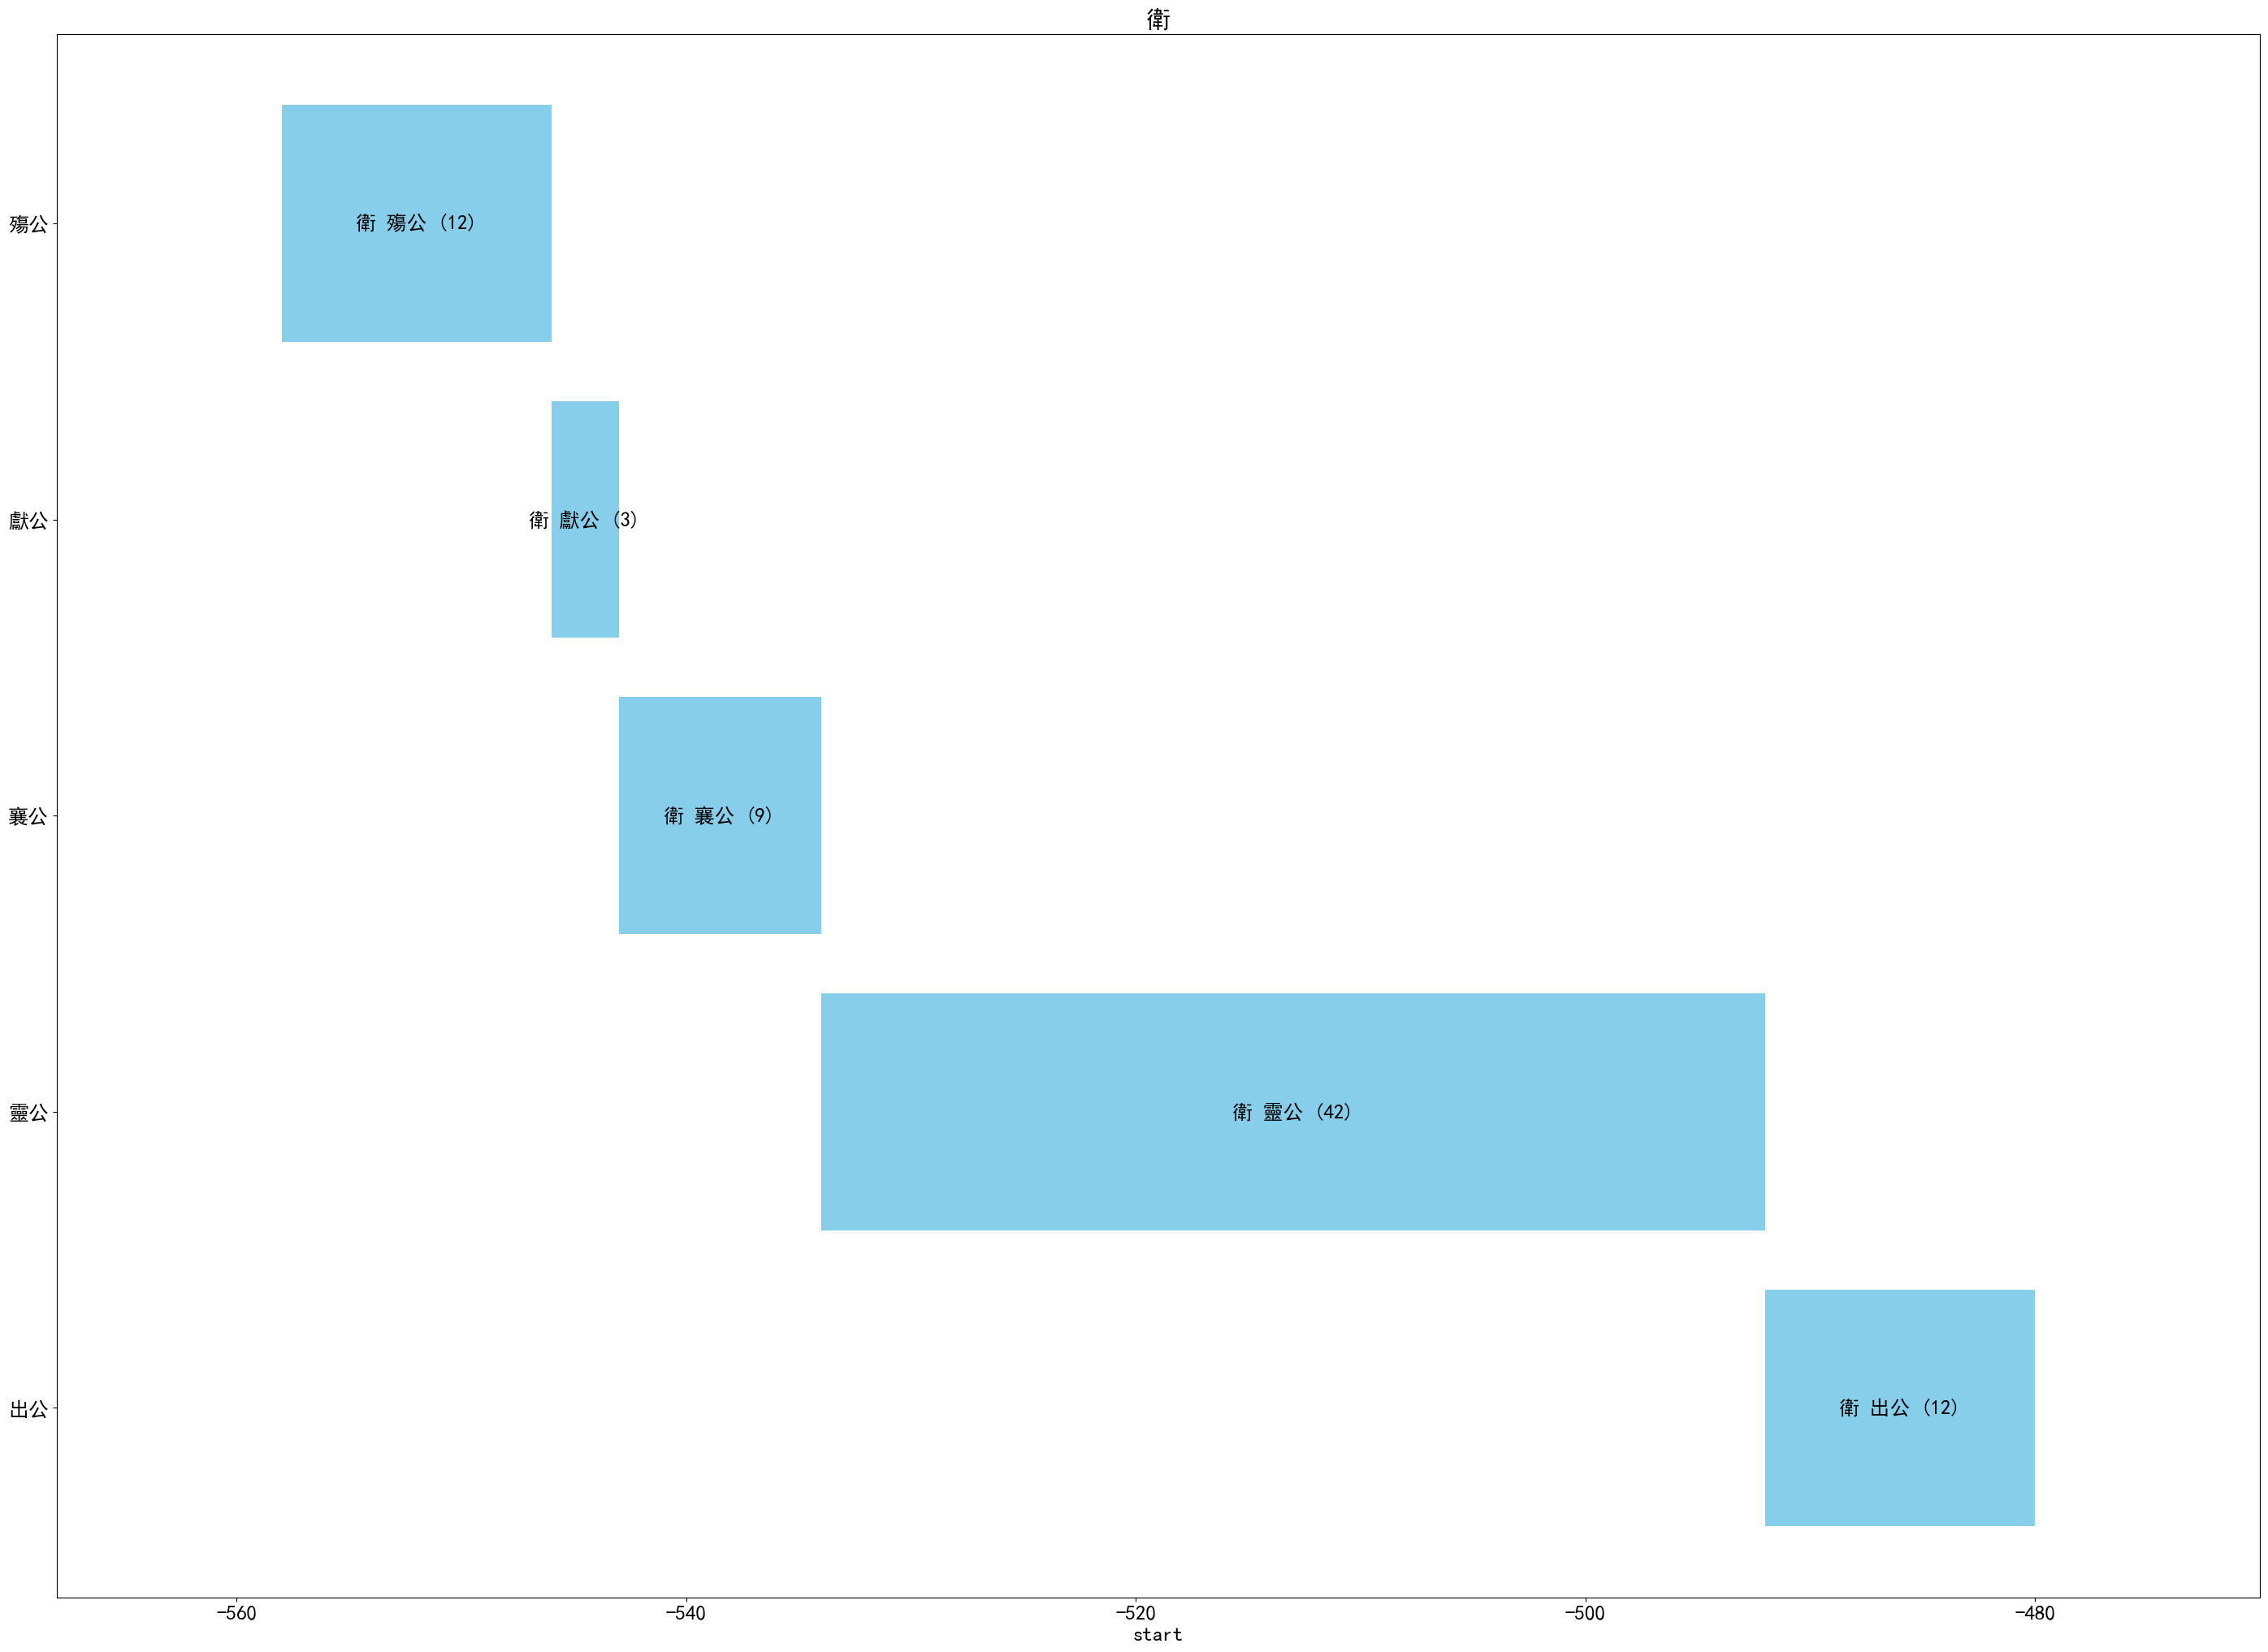

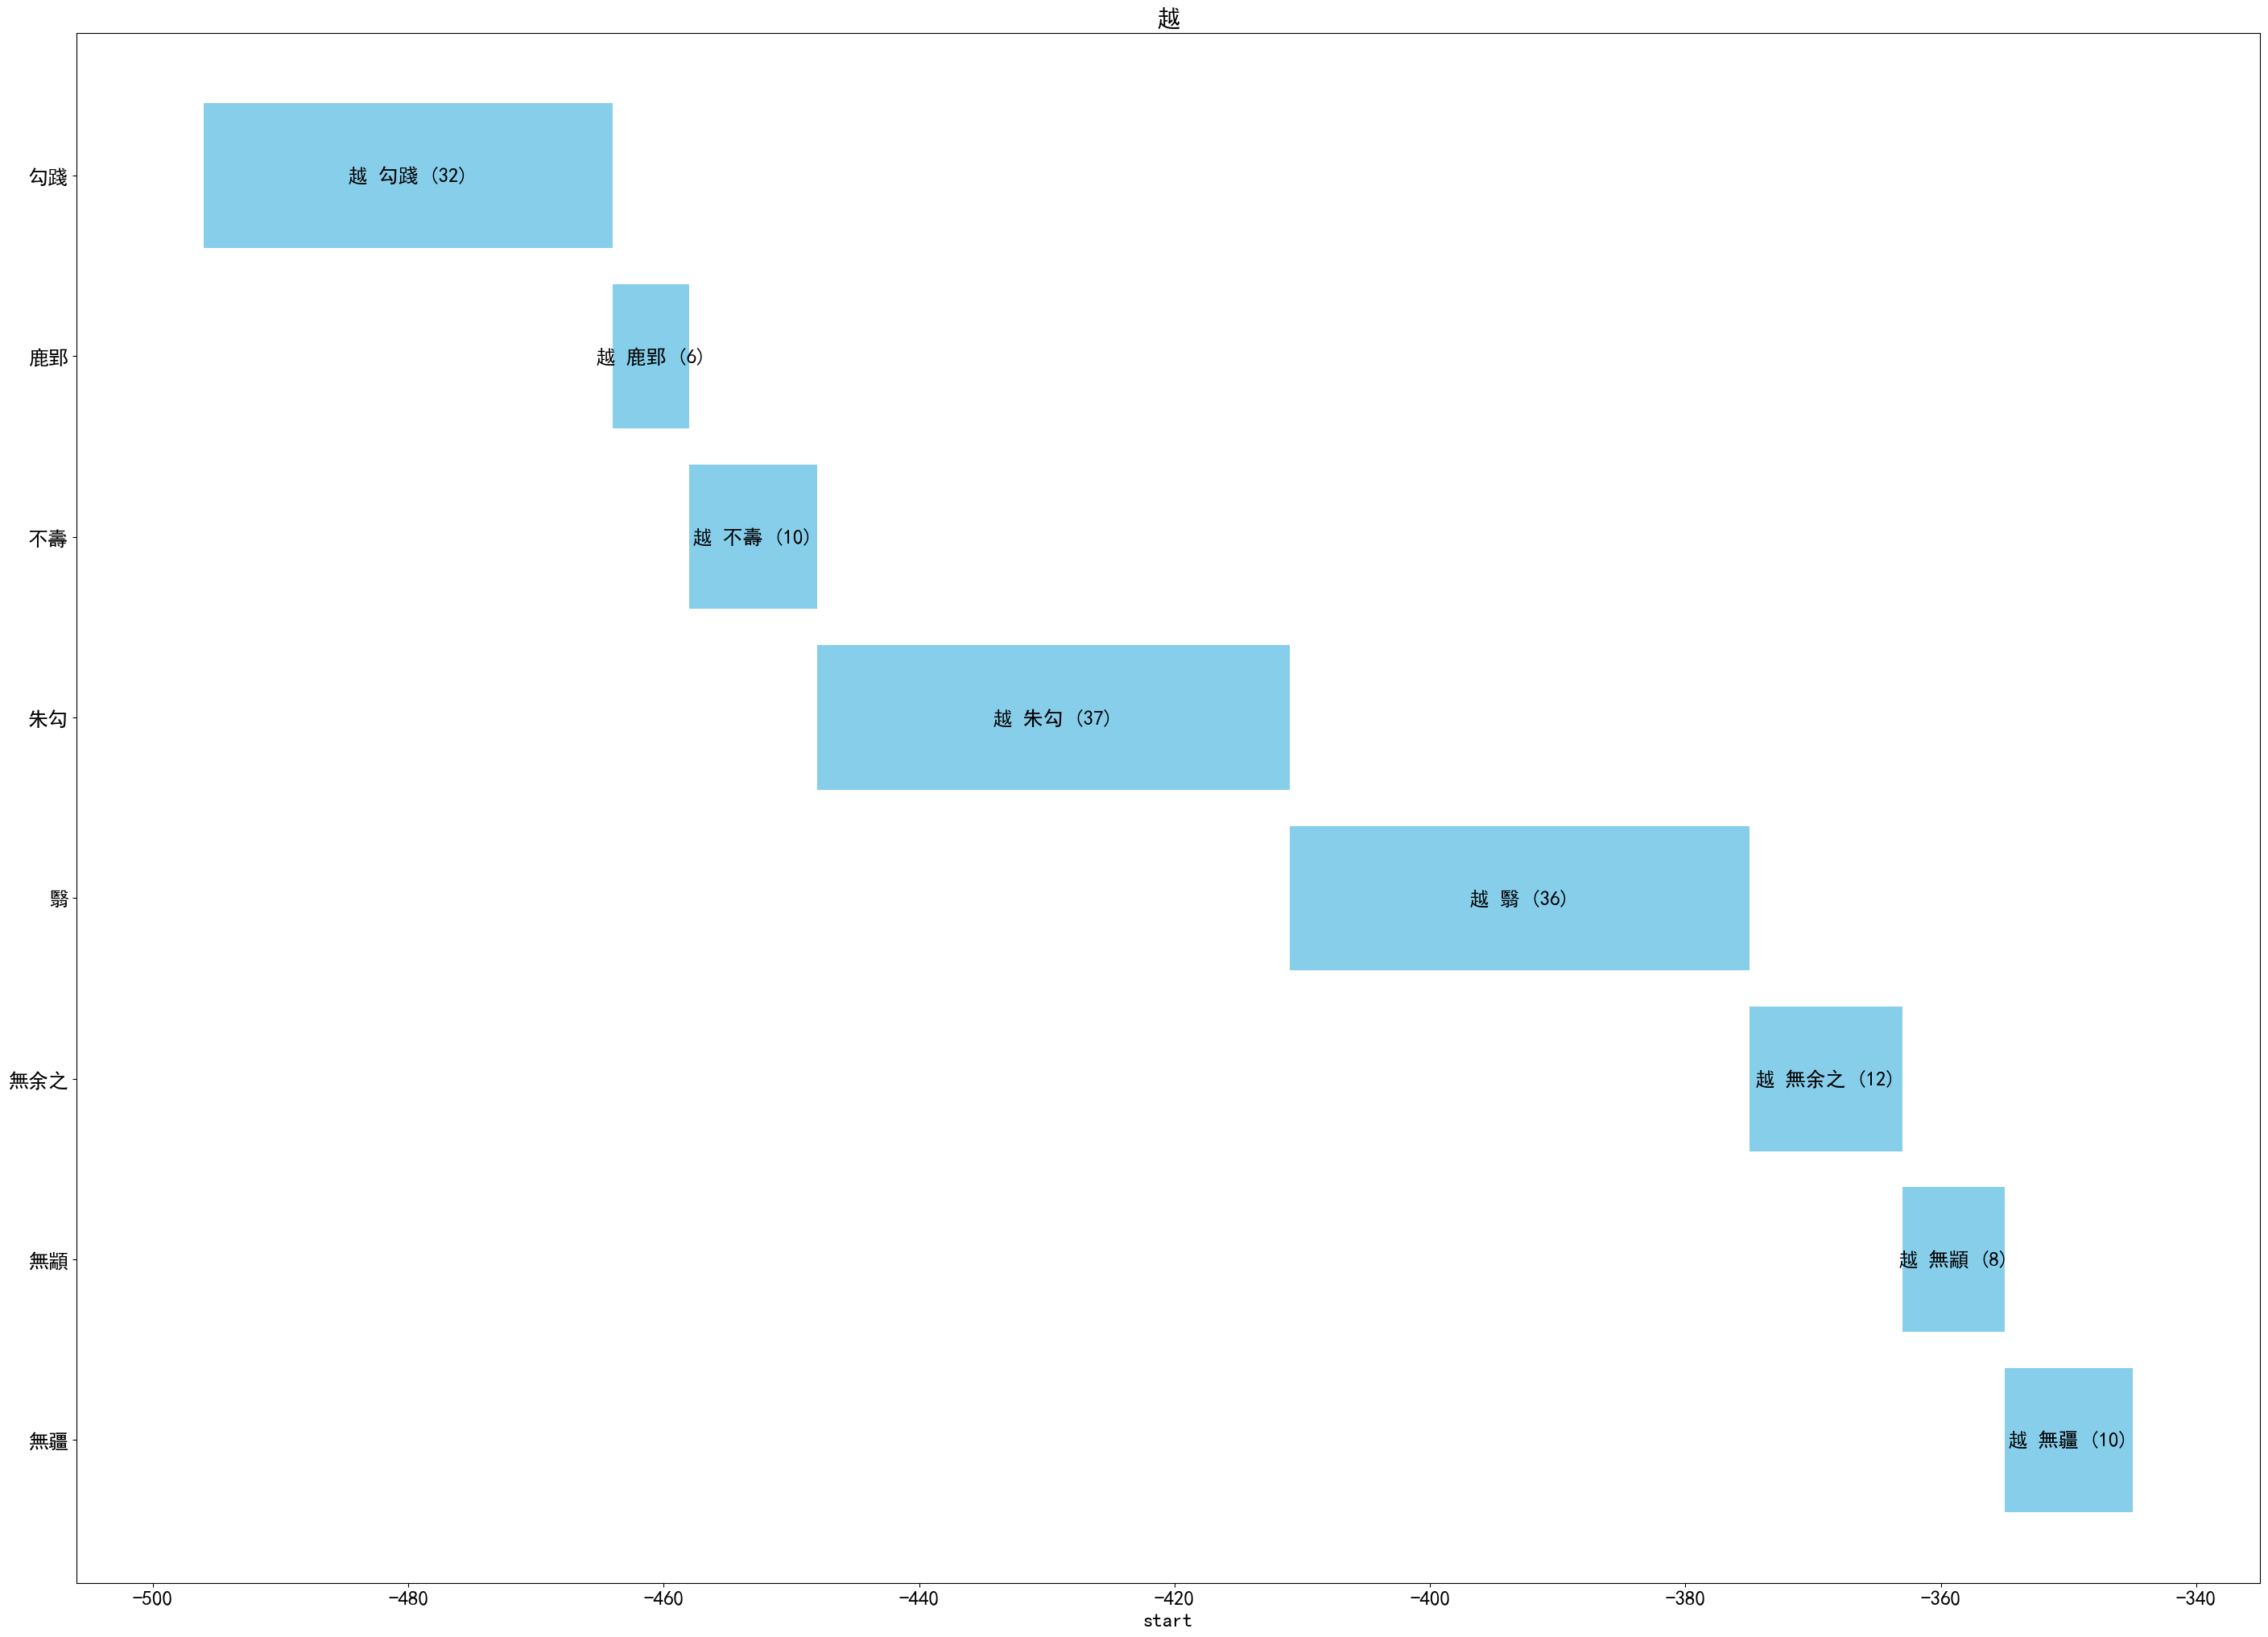

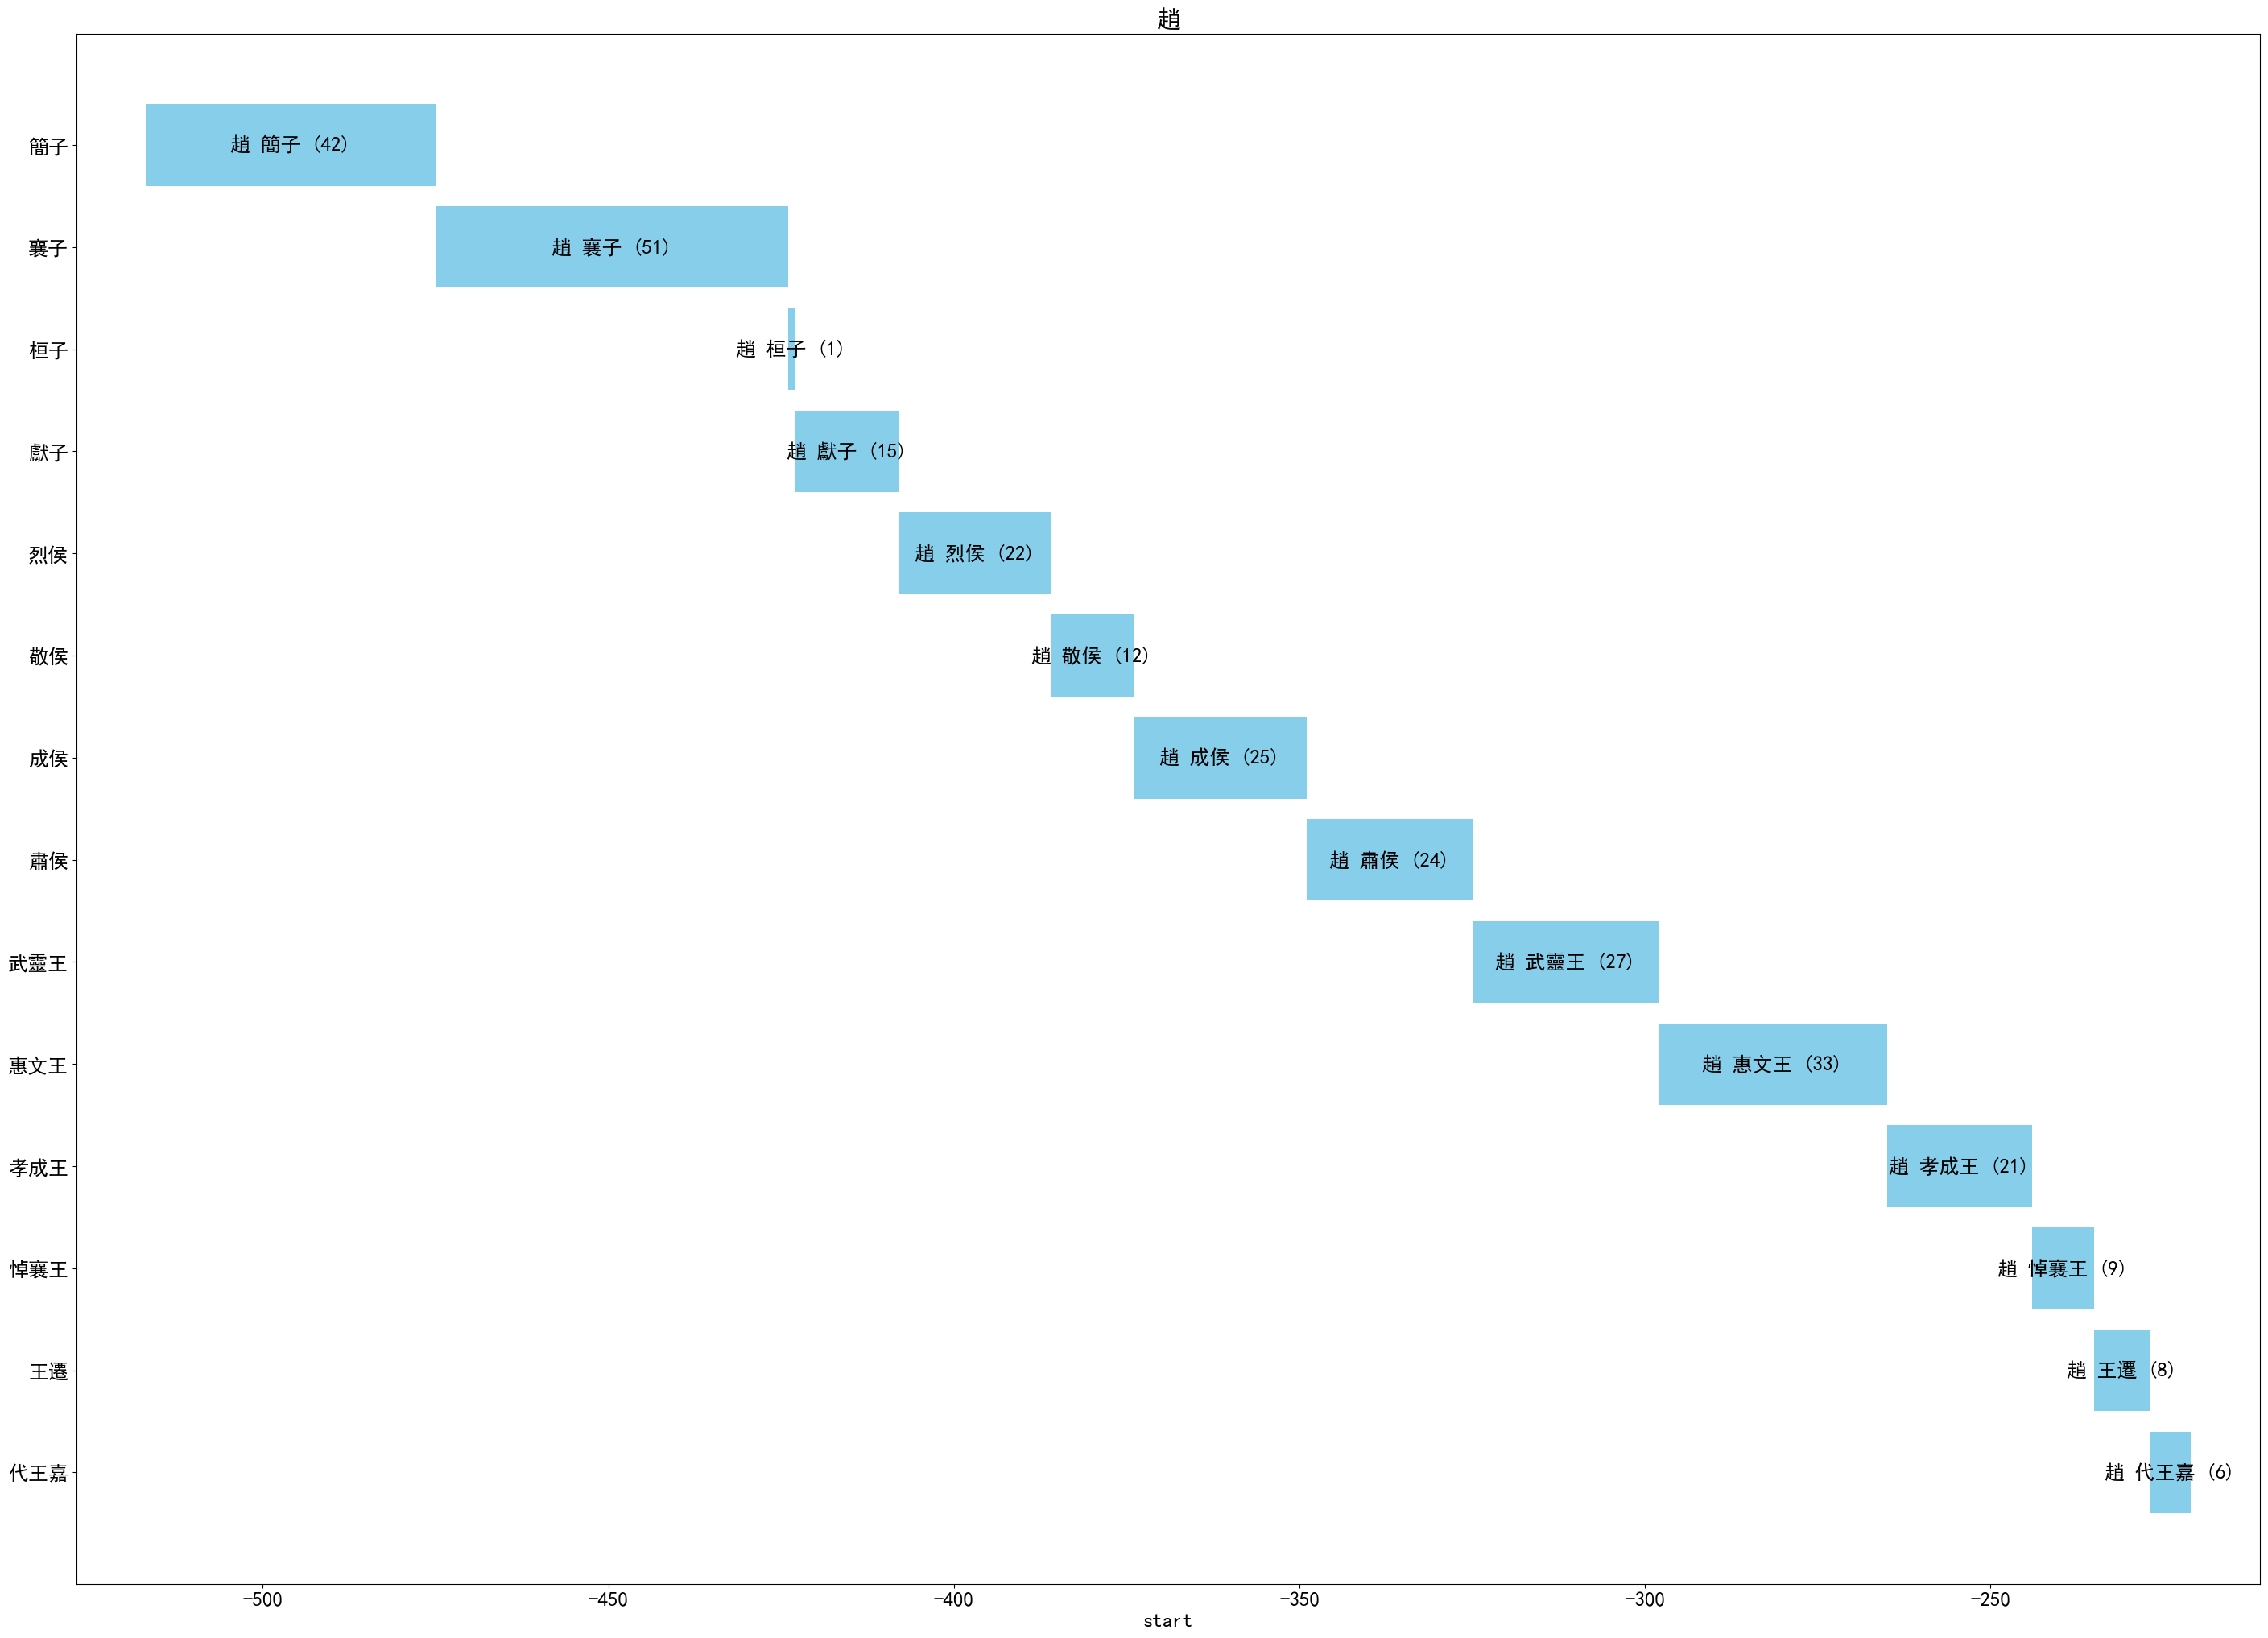

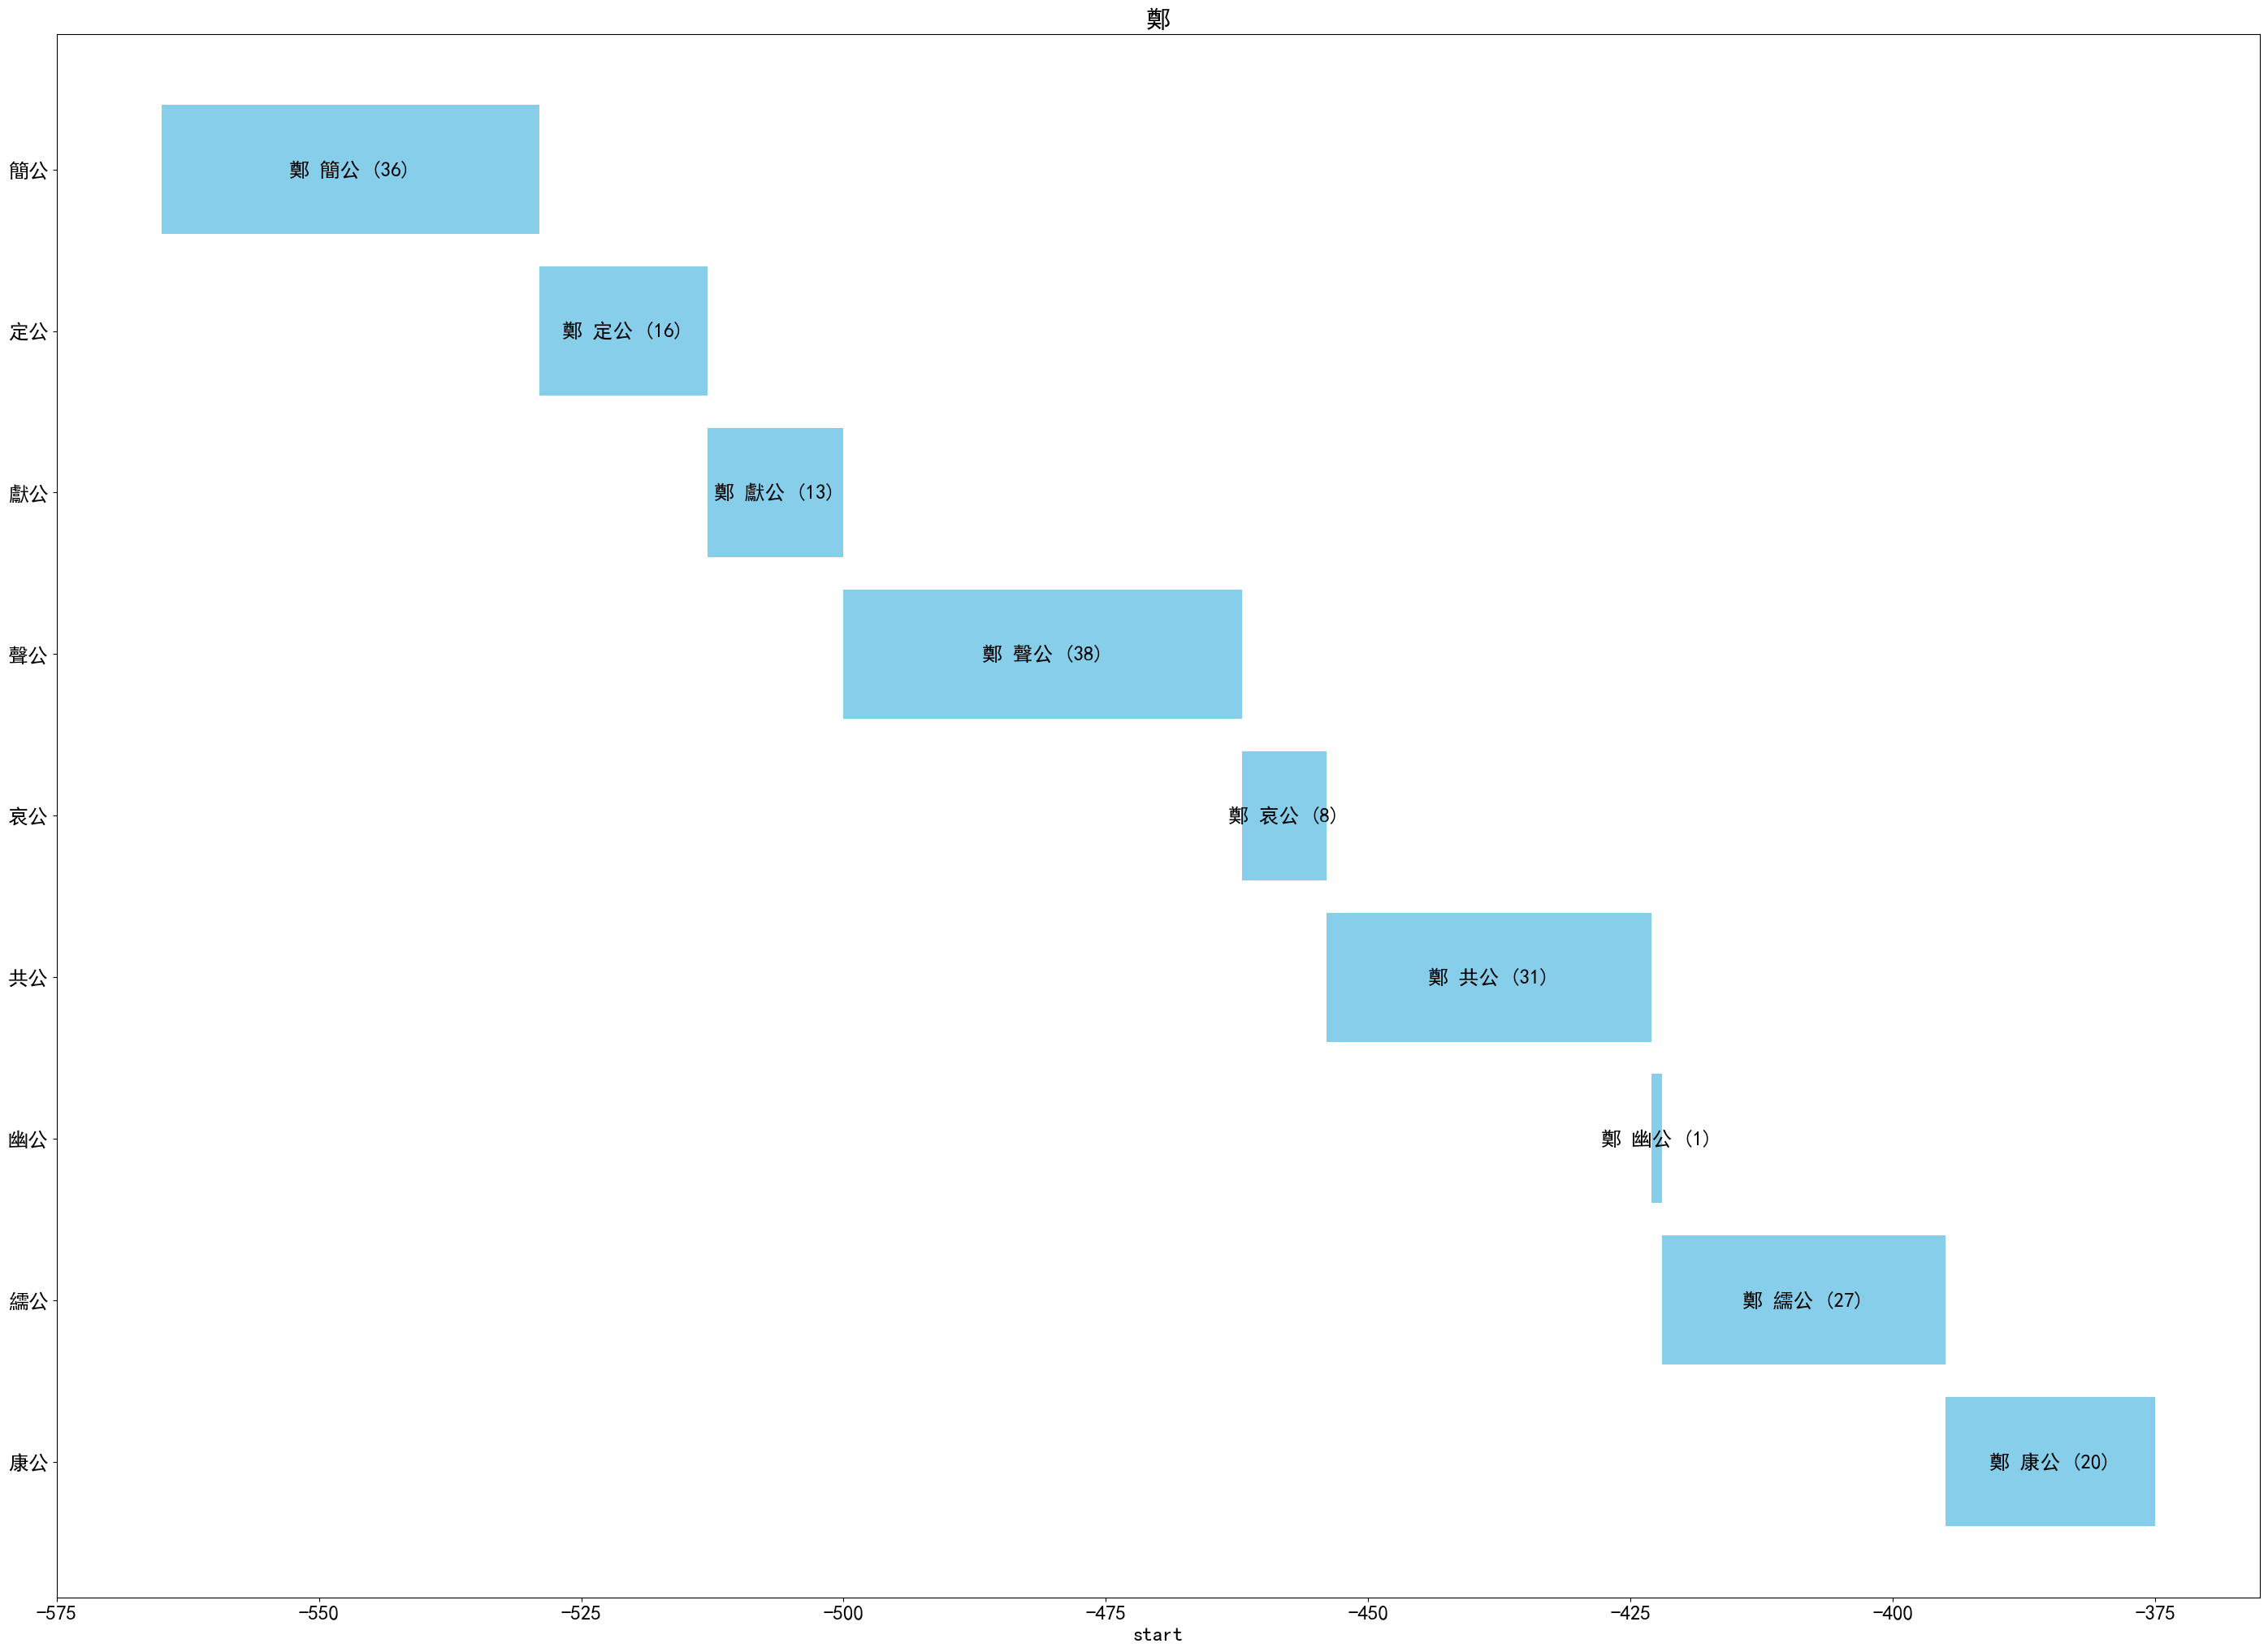

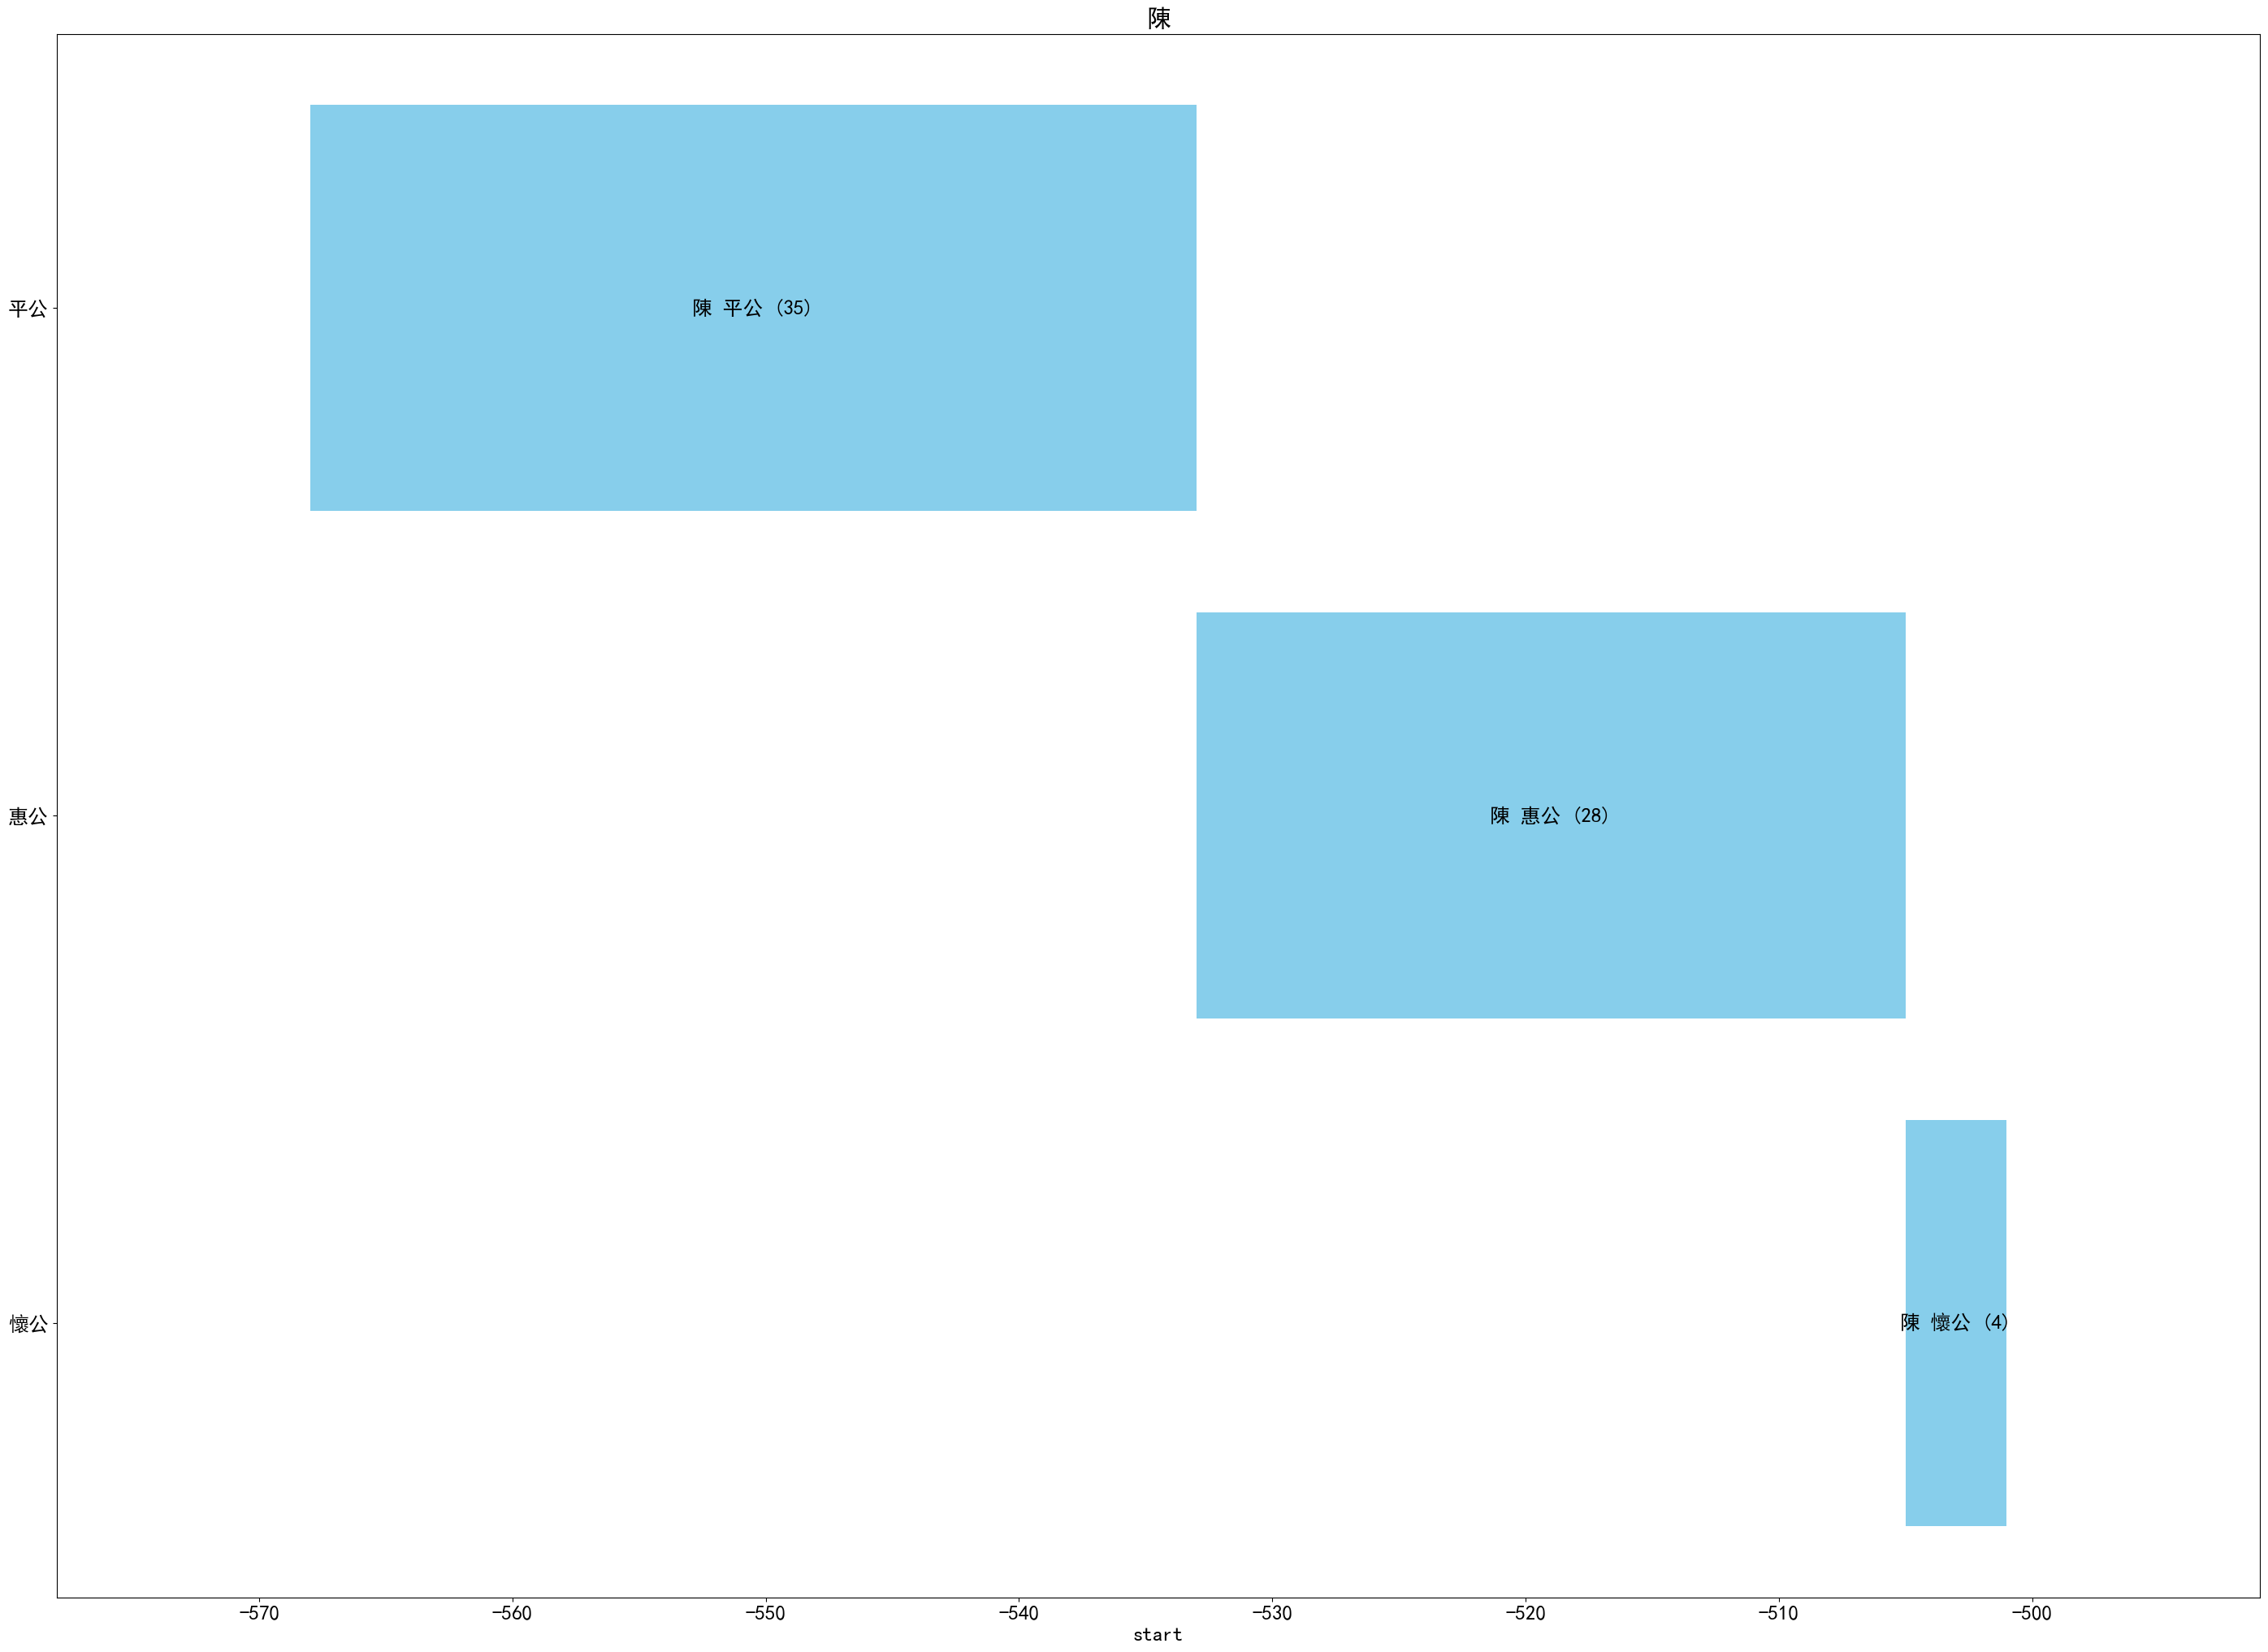

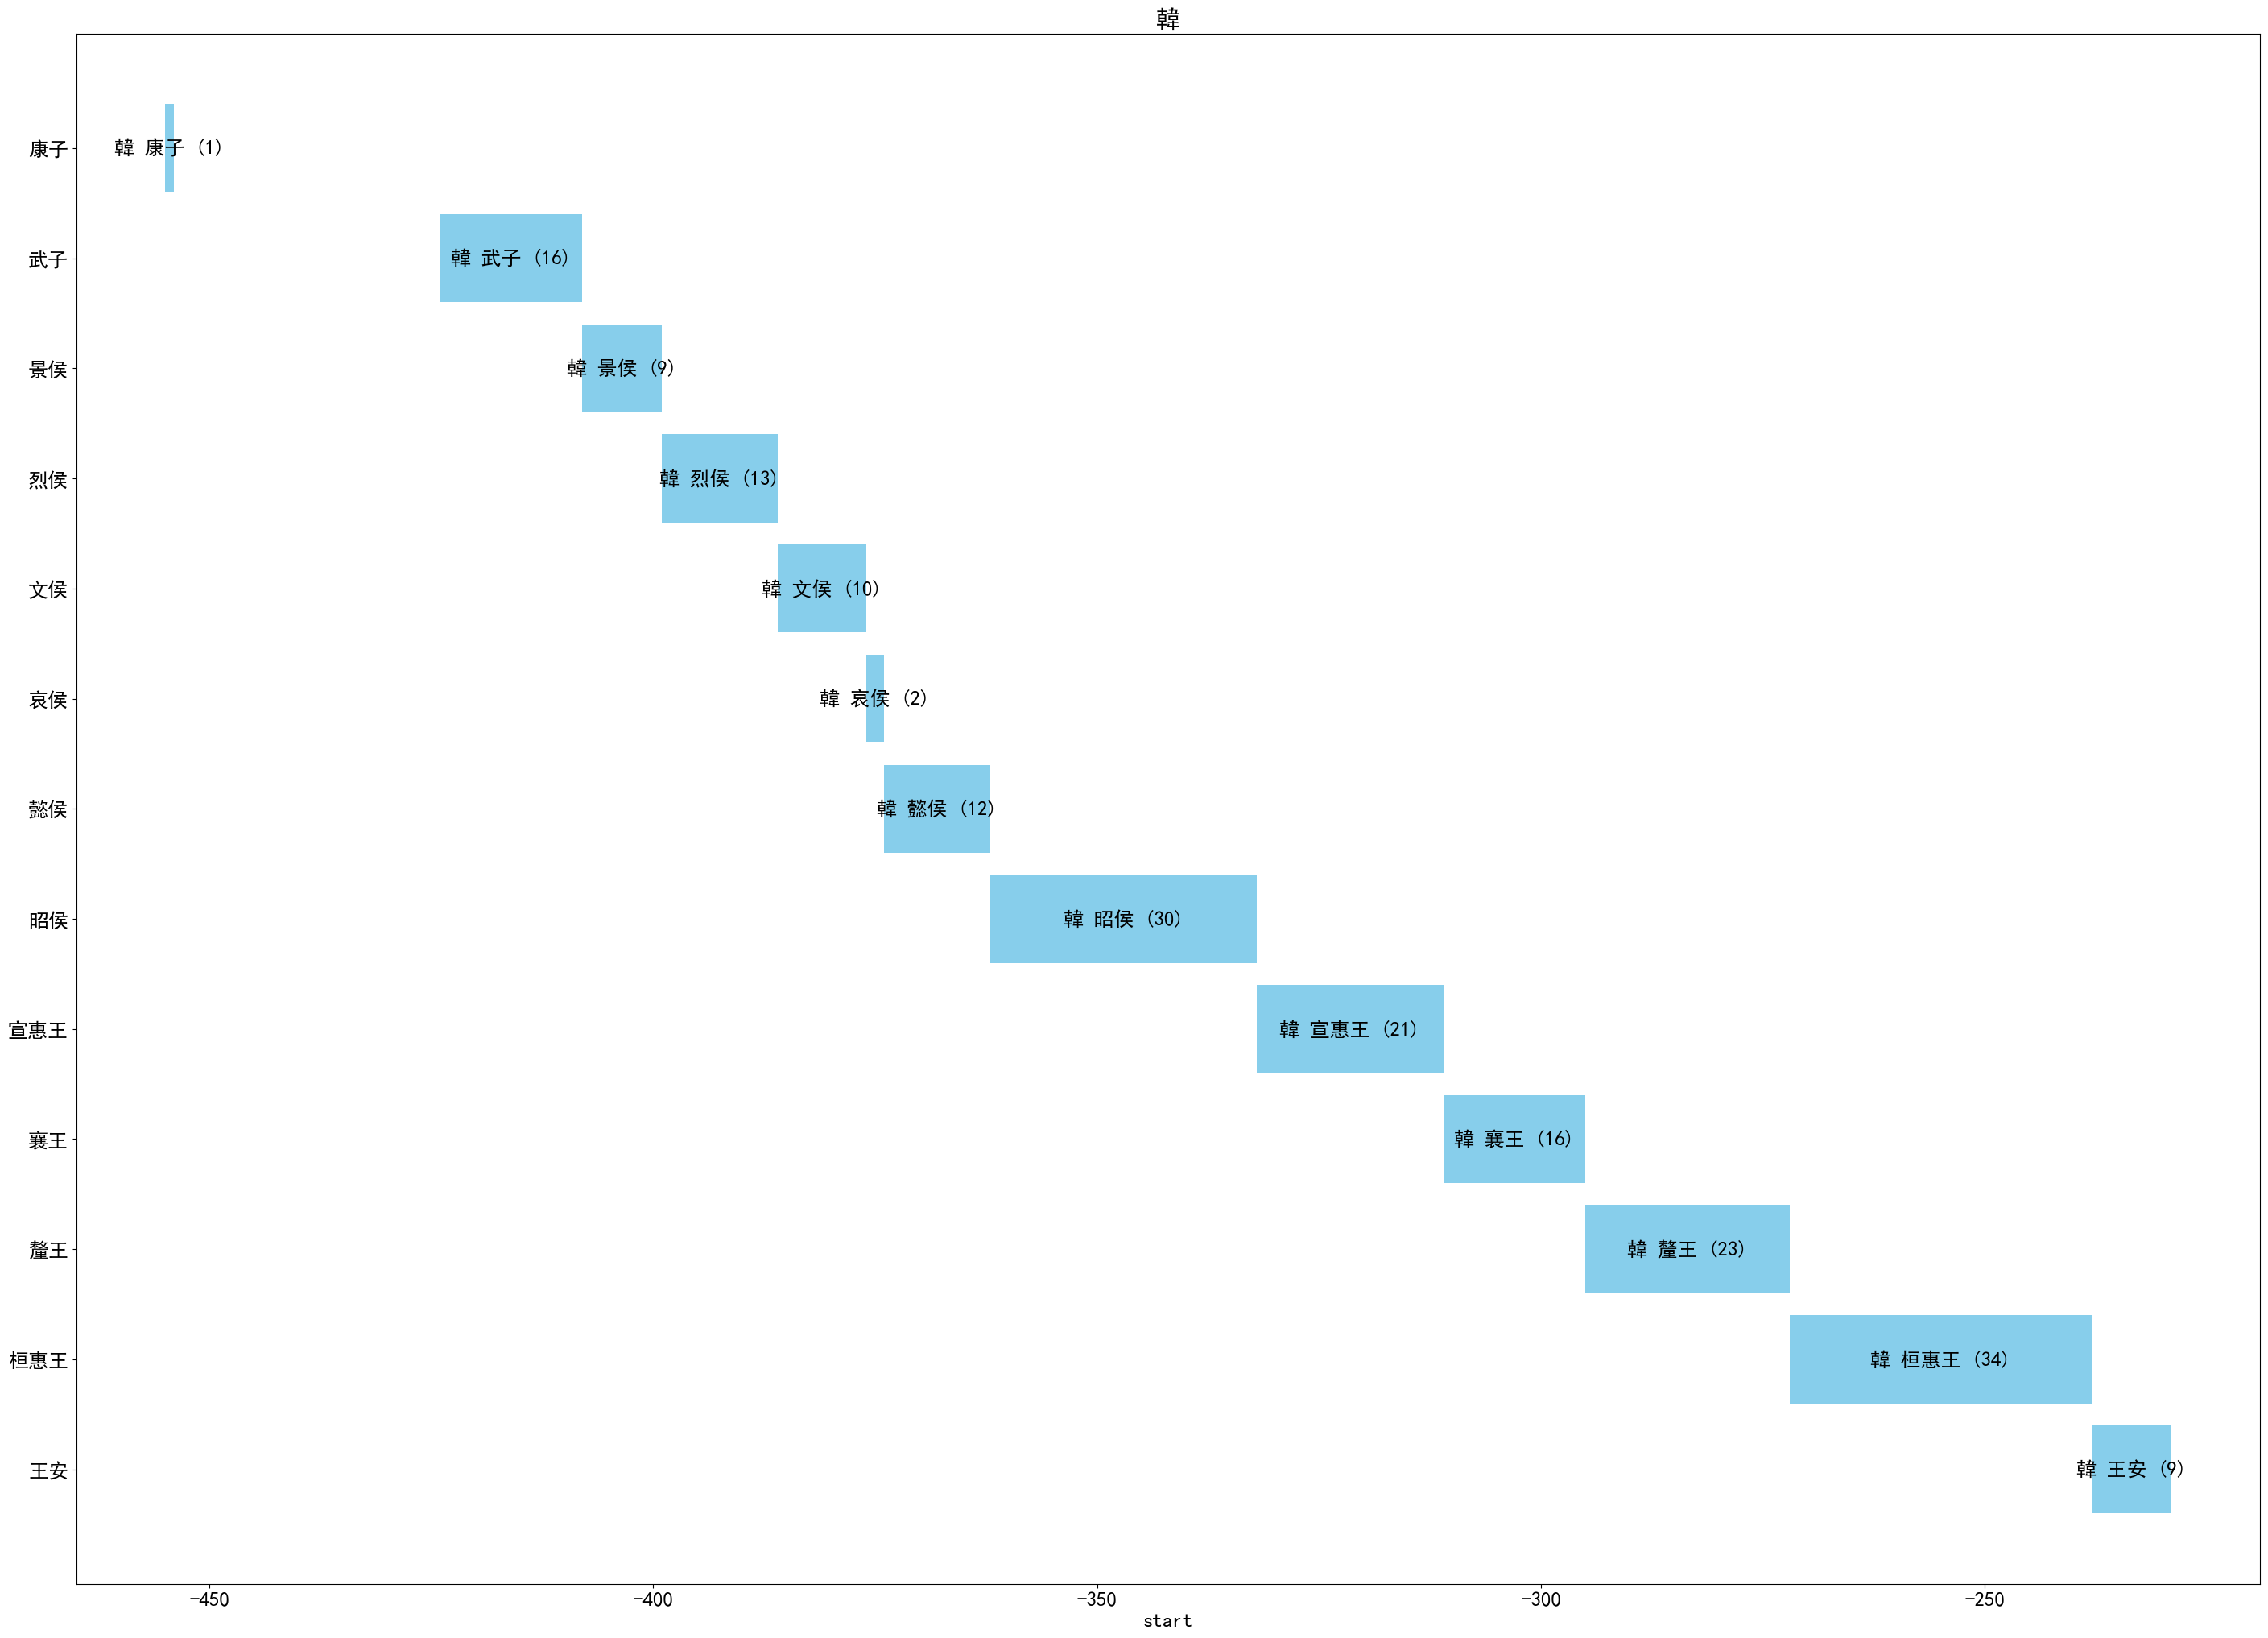

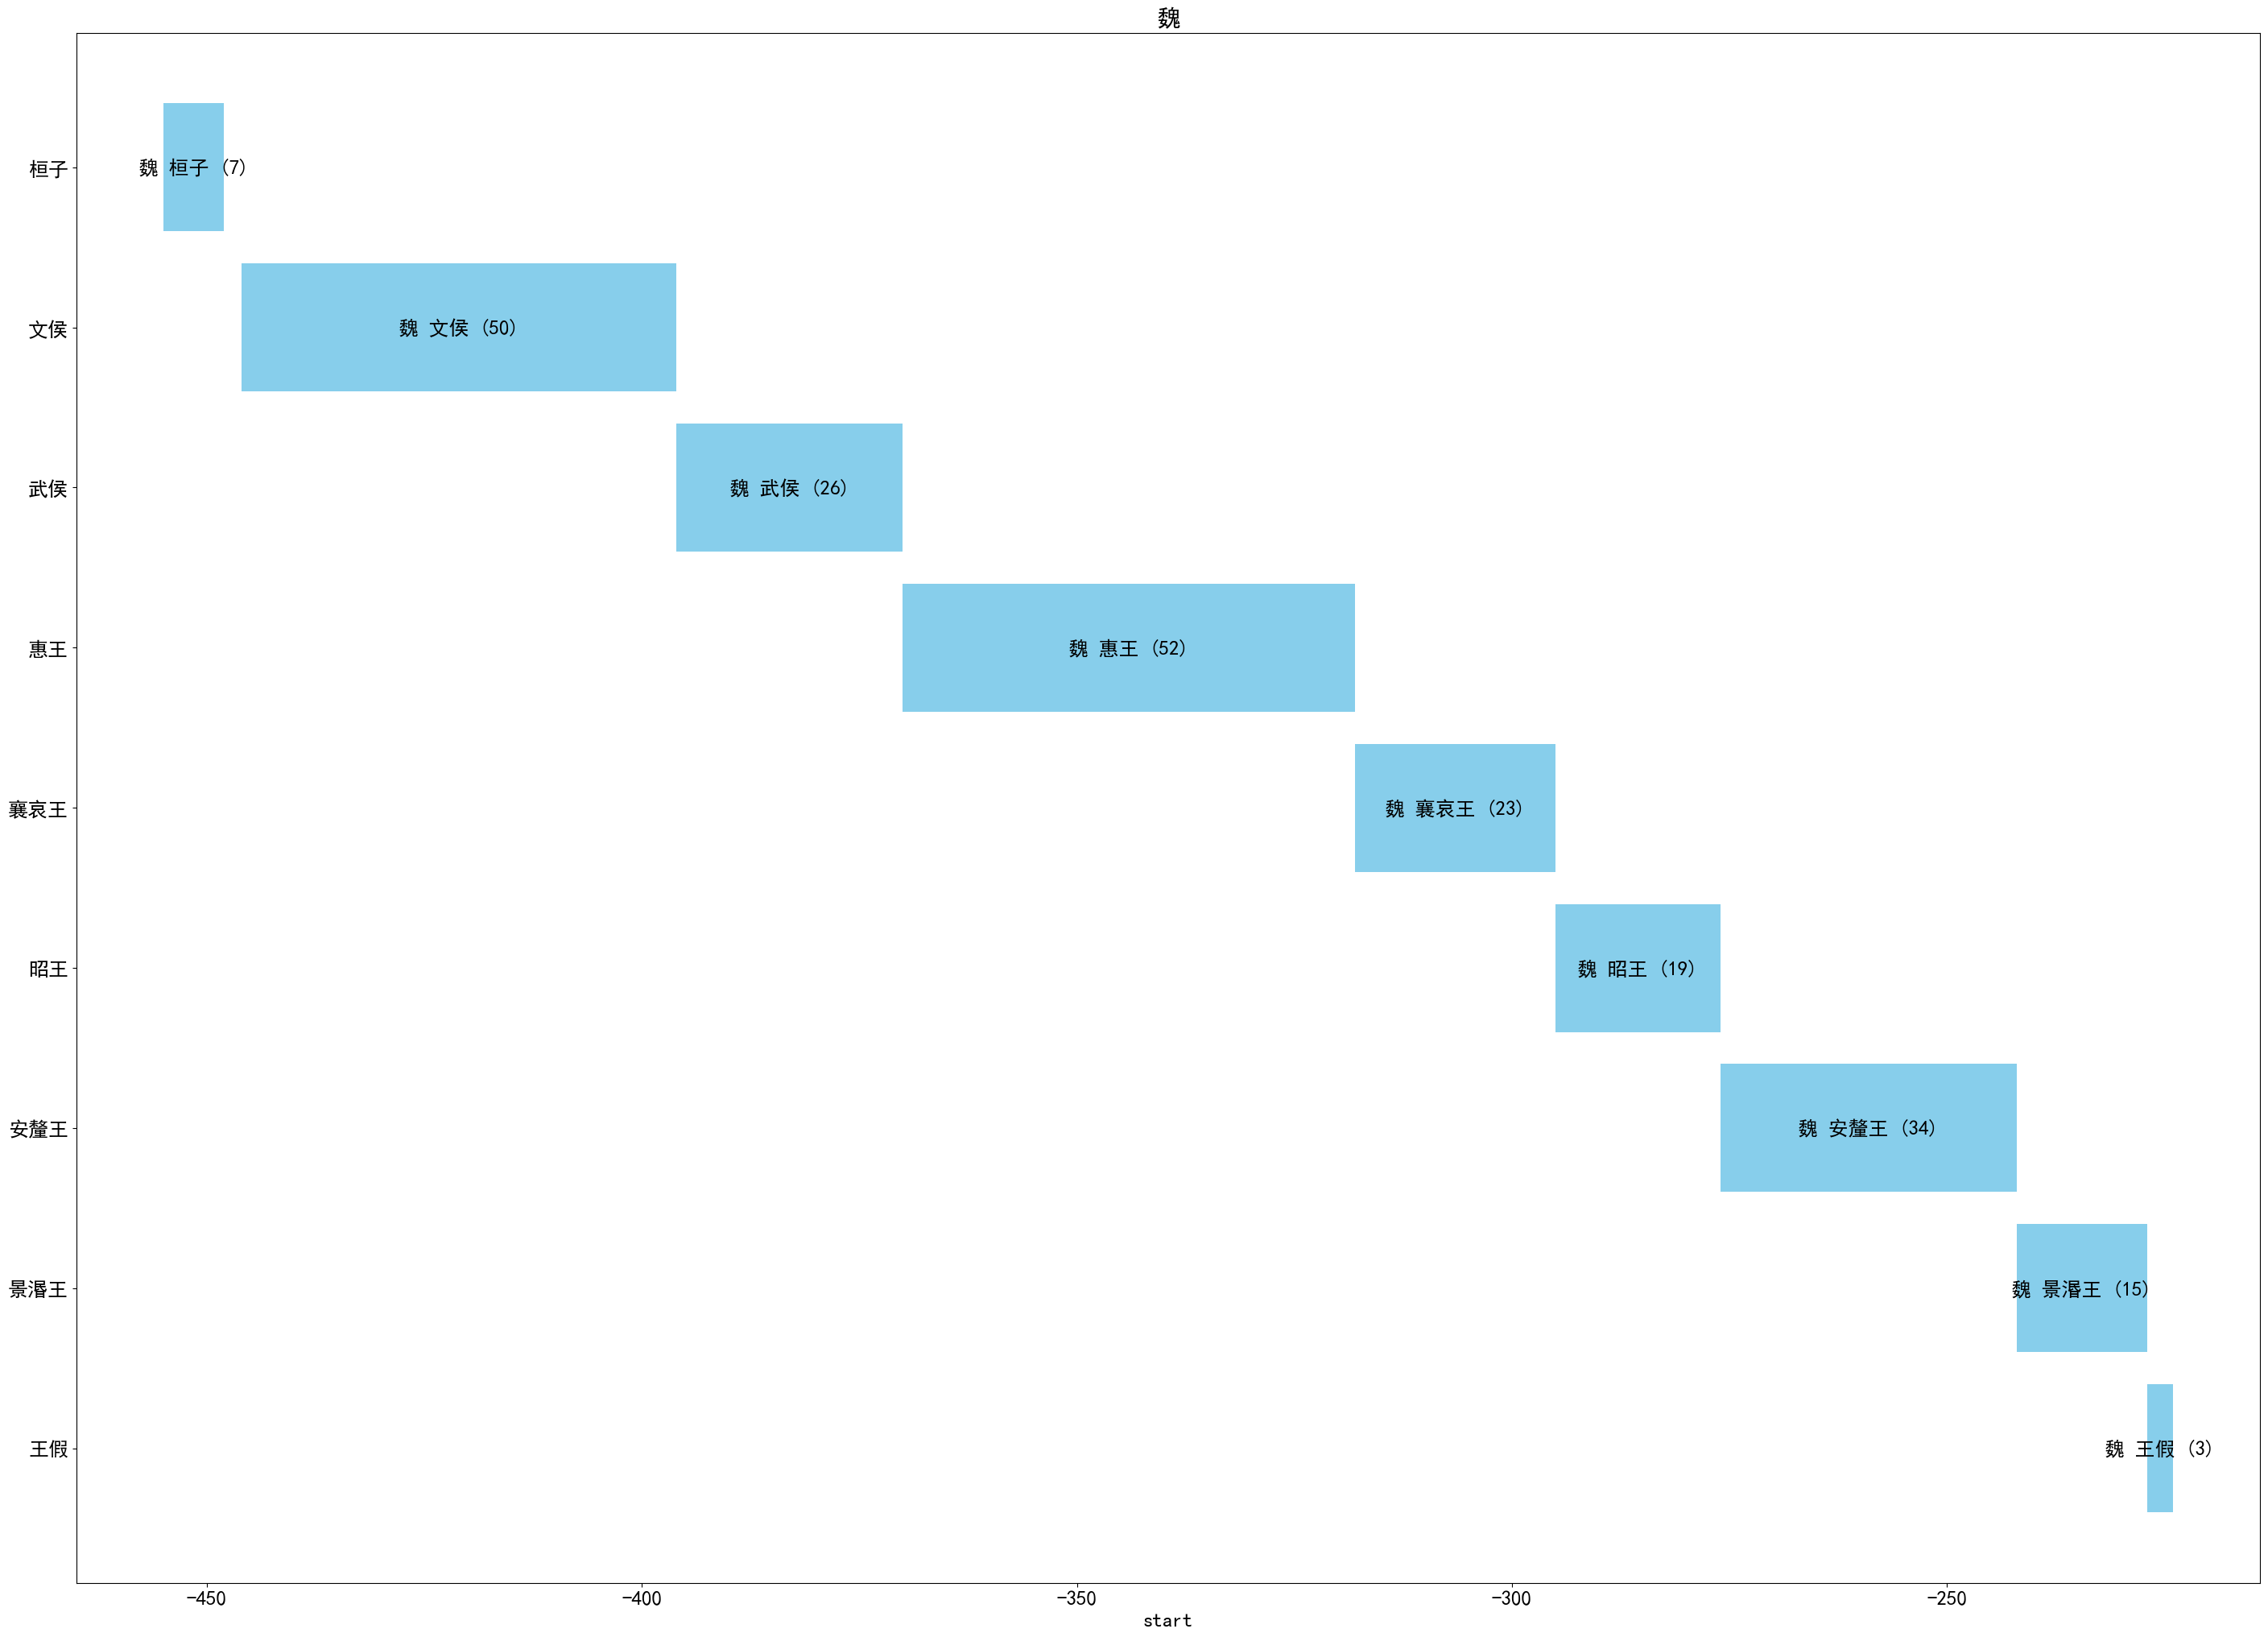

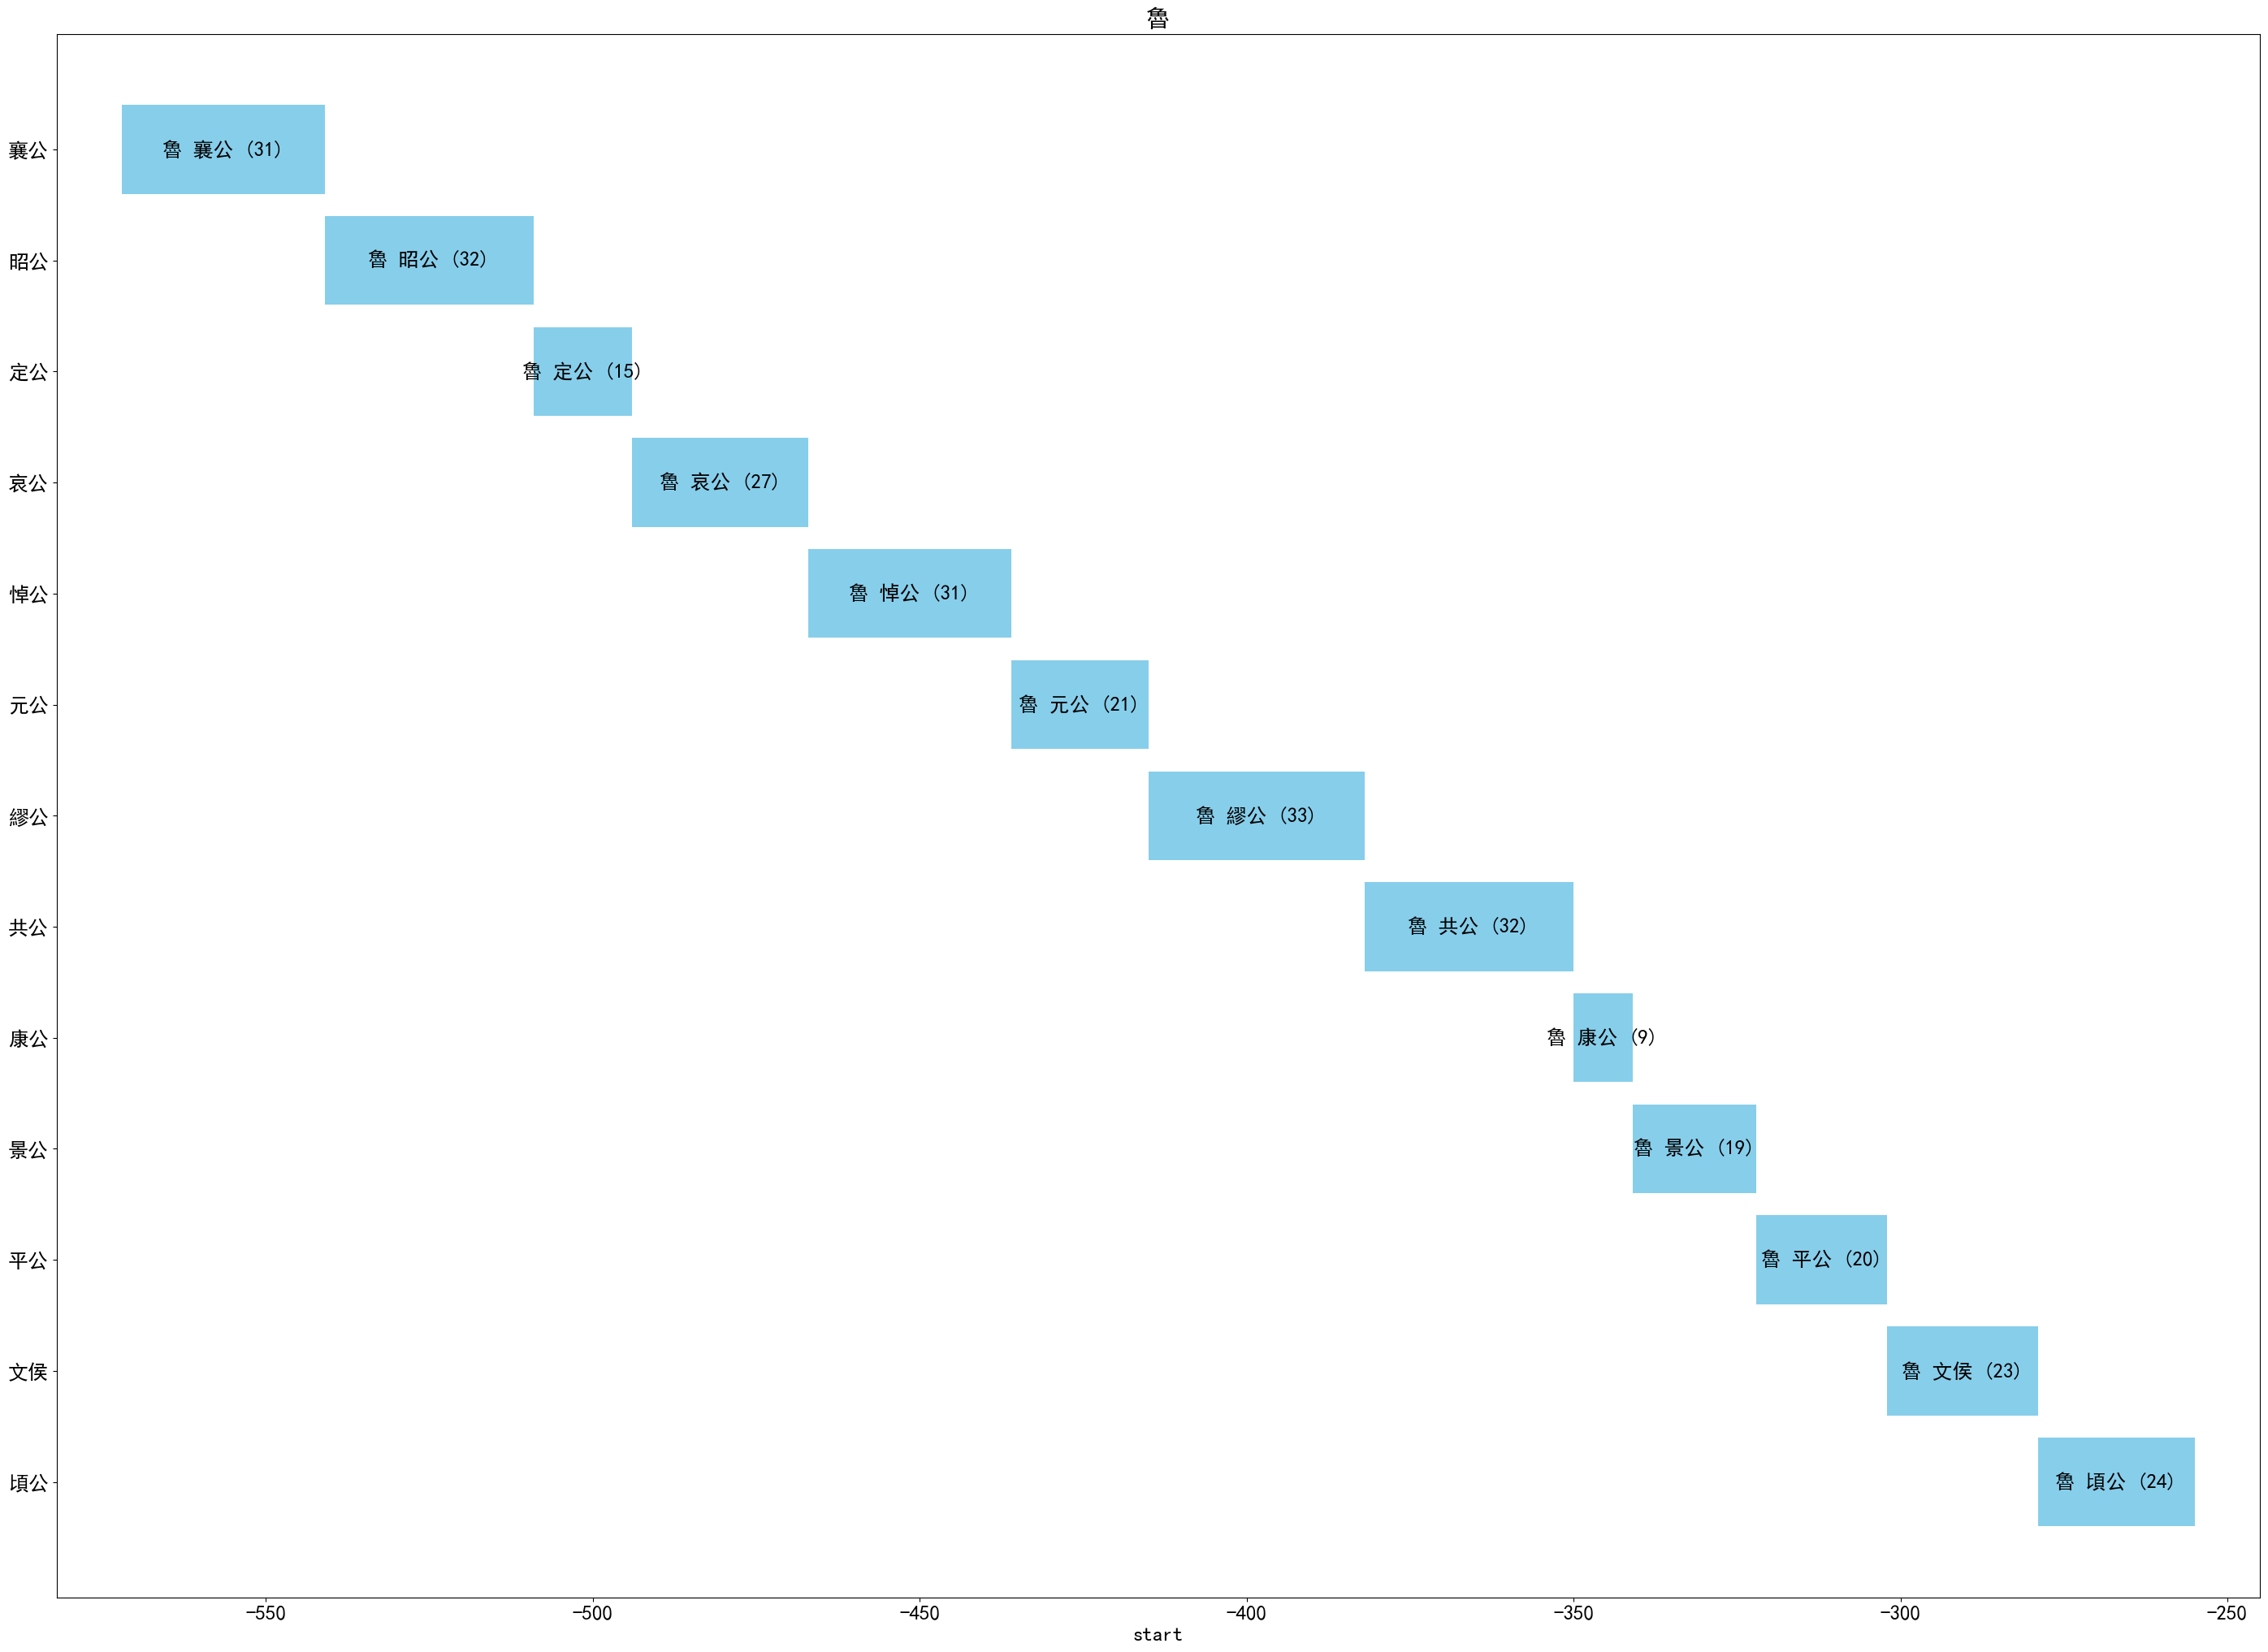

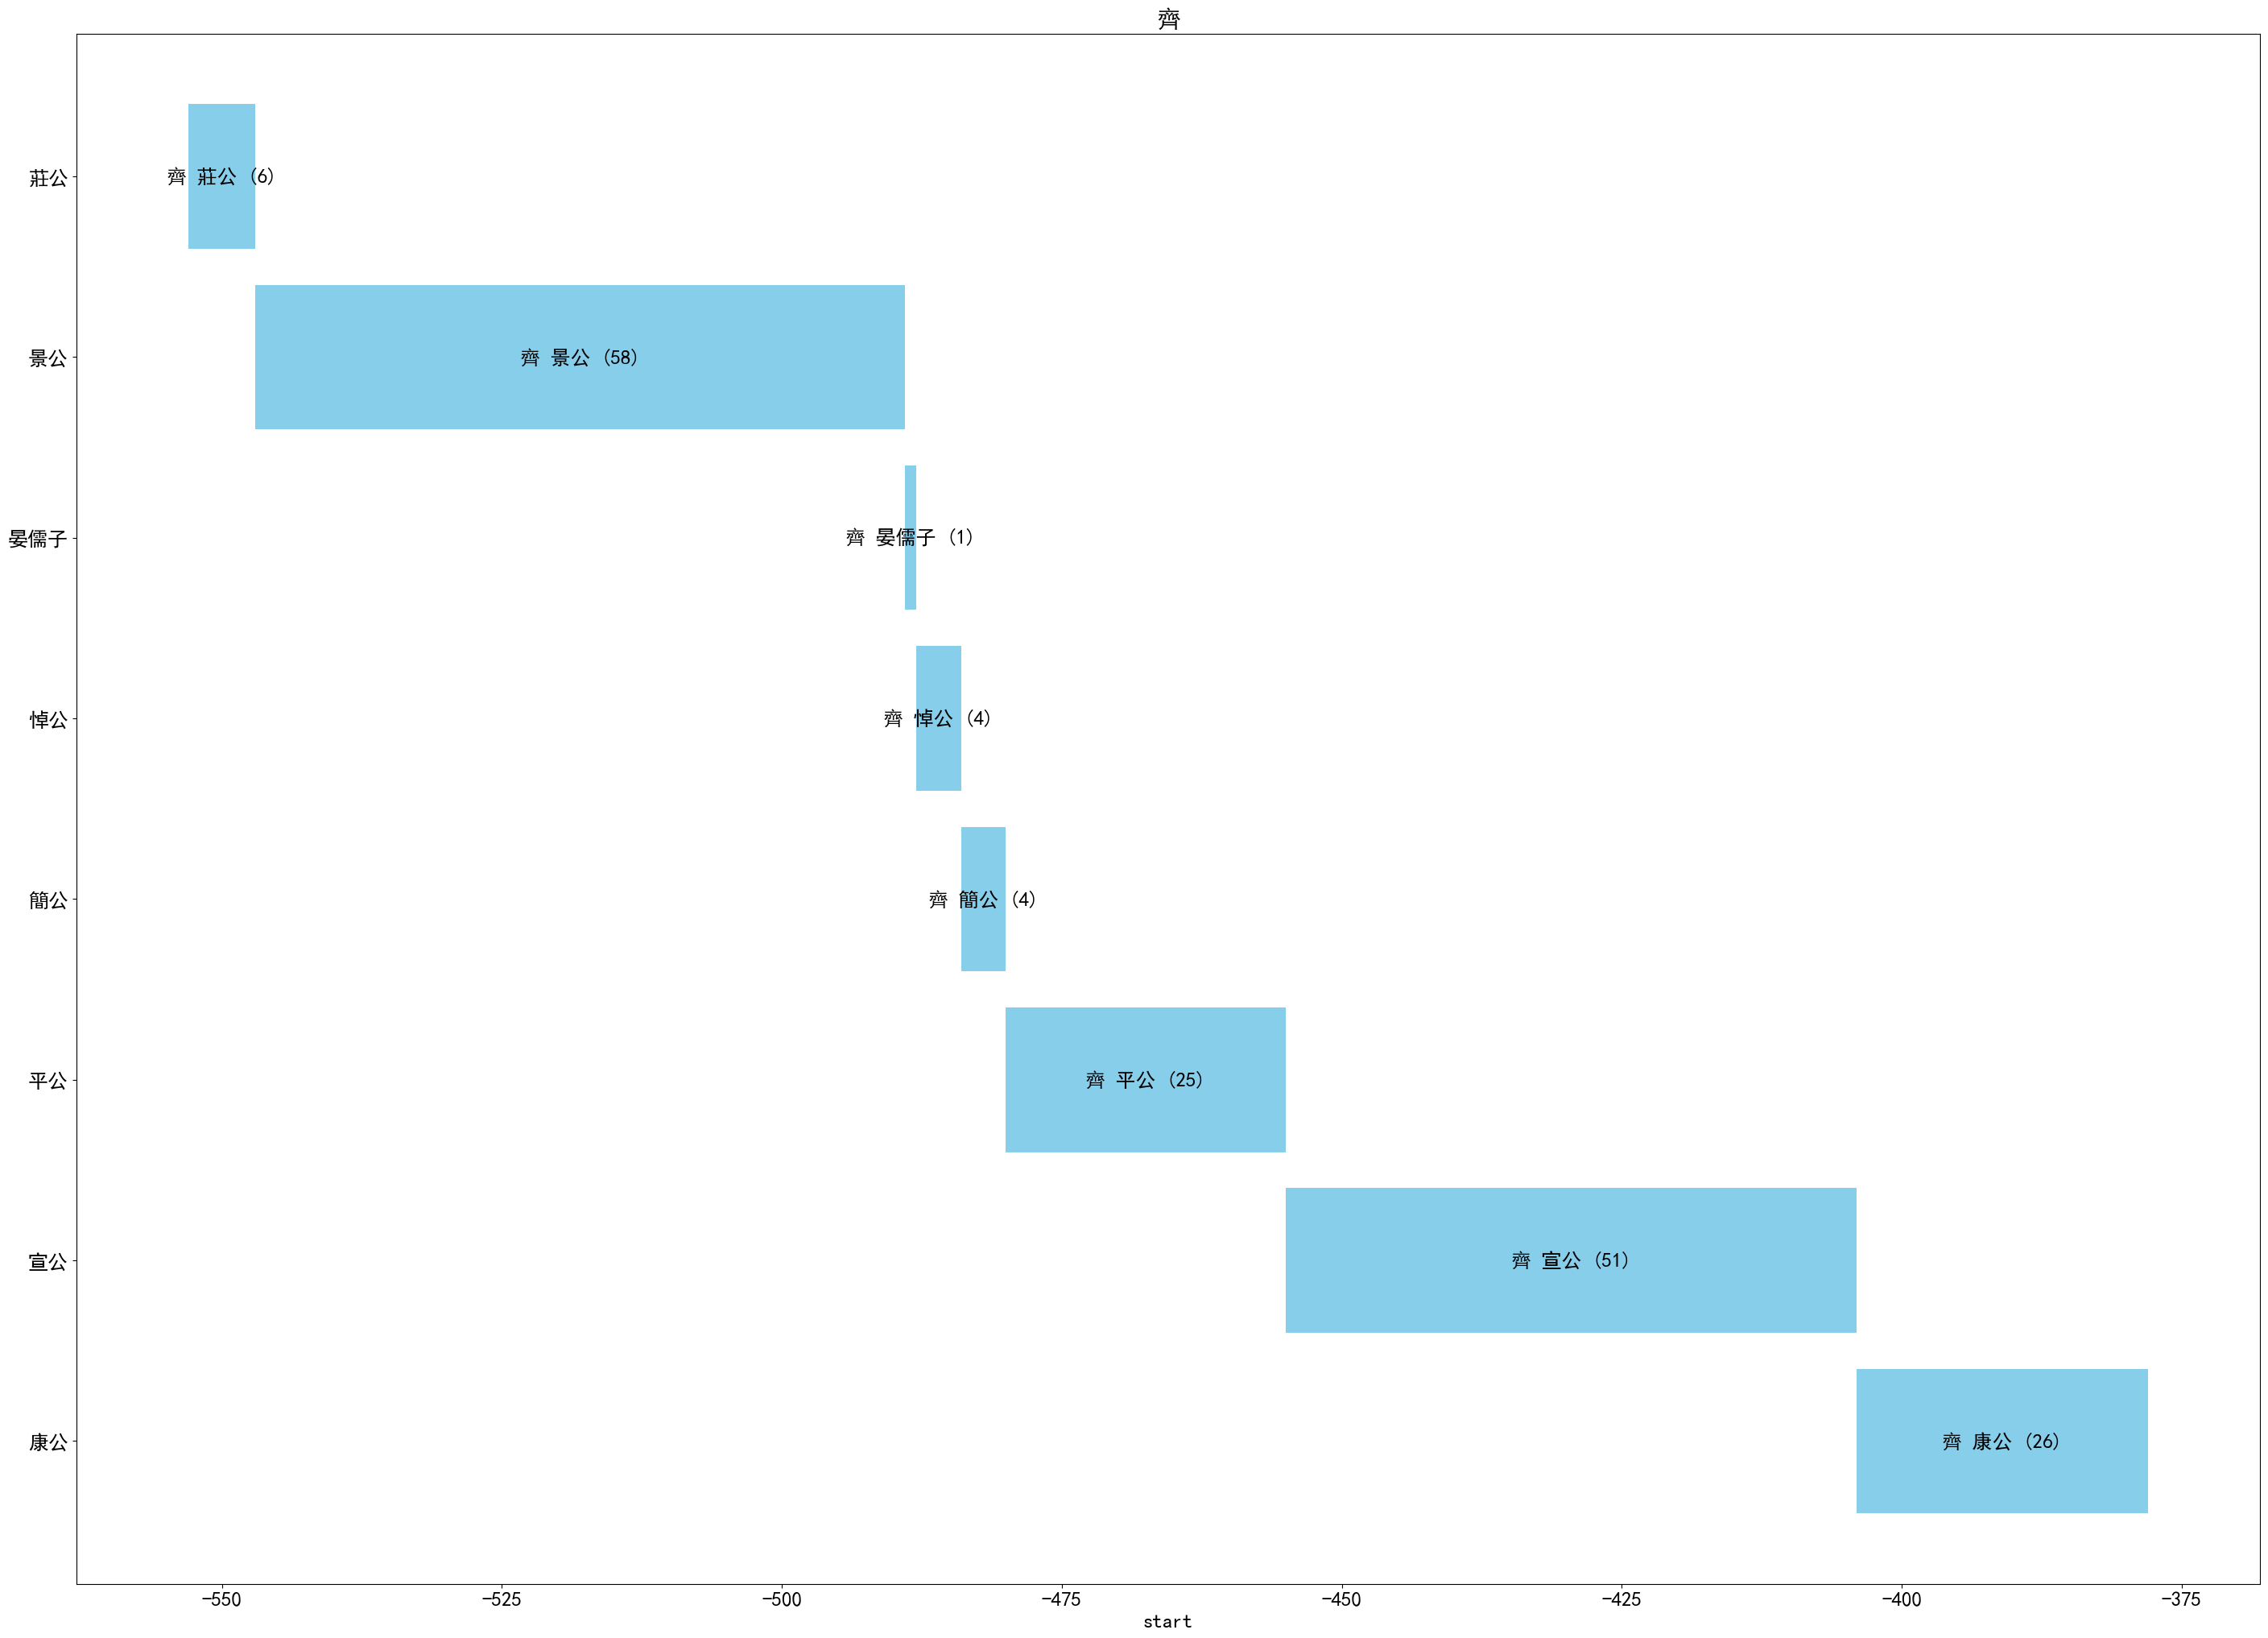

In [19]:
gb_state = df.groupby('state')

for k, v in gb_state:
    v = v[v.span!=0]
    
    first = v.iloc[0]
    last = v.iloc[-1]
    lb = first.start - 10
    rb = last['start'] + last['span'] + 10
    
    # Reverse the table so the oldest oldest lord is at the top of y-axis. 
    # As such the old to new bars will be plotted from upper left to lower right.
    v = v[::-1]
    plot_barh(v, lb, rb, 'state')

In [20]:
# Plot all between -550 to 500
df['end'] = df['start'] + df['span']
df

,start,state,lord,span,notes,end
0,-591,蔡,景公,49,表1,-542
1,-575,宋,平公,44,,-531
2,-572,魯,襄公,31,,-541
3,-571,周,靈王,27,,-544
4,-568,陳,平公,35,,-533
...,...,...,...,...,...,...
176,-235,趙,王遷,8,,-227
177,-227,魏,王假,3,-224 滅,-224
178,-227,趙,代王嘉,6,-221 滅,-221
179,-227,楚,王負芻,5,-222 滅,-222


In [21]:
df[df.end>lb]

,start,state,lord,span,notes,end
0,-591,蔡,景公,49,表1,-542
1,-575,宋,平公,44,,-531
2,-572,魯,襄公,31,,-541
3,-571,周,靈王,27,,-544
4,-568,陳,平公,35,,-533
...,...,...,...,...,...,...
176,-235,趙,王遷,8,,-227
177,-227,魏,王假,3,-224 滅,-224
178,-227,趙,代王嘉,6,-221 滅,-221
179,-227,楚,王負芻,5,-222 滅,-222


In [22]:
def plot_range(df, lb, ub):
    dfa = df[df.end<ub]
    dfb = dfa[dfa.end>lb]
    dfb = dfb[::-1]
    plot_barh(dfb, lb-20, ub+10, f'From {lb} to {ub}')

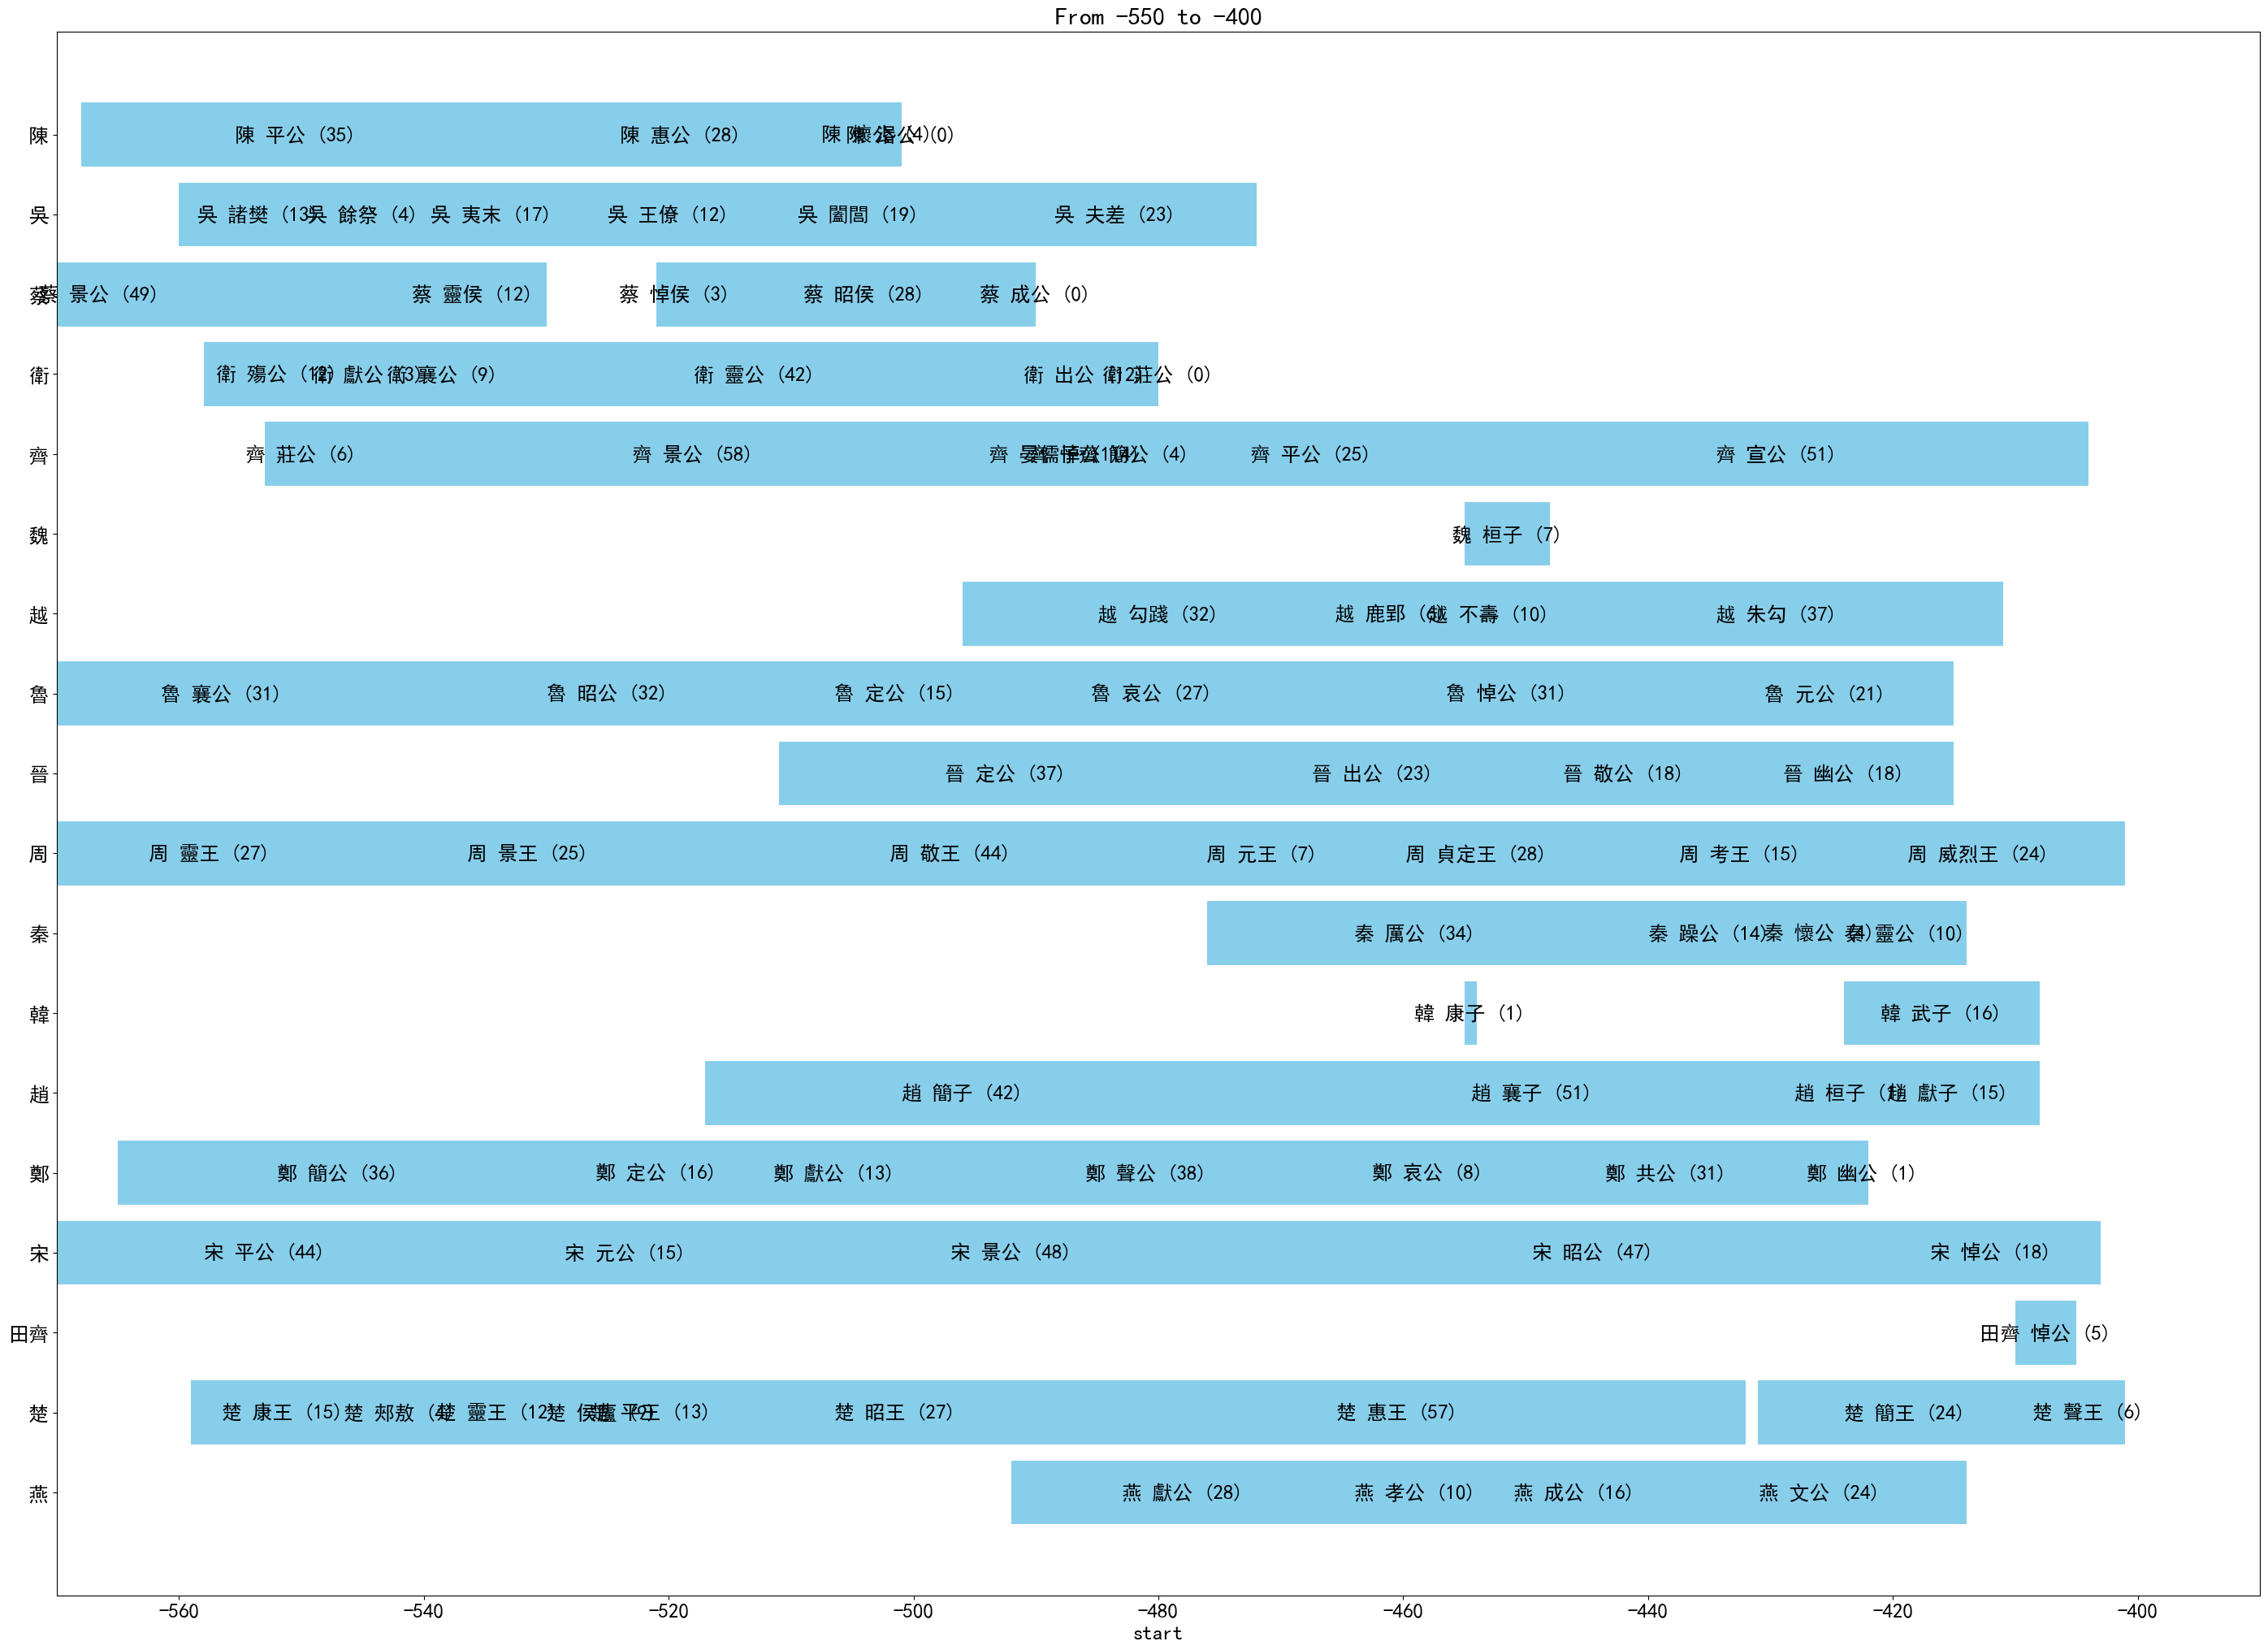

In [23]:
lb = -450
ub = -400

lb = -550
ub = -400

plot_range(df, lb, ub)